# The rise of broadcasting video on demand
## Predicting buying costs

_Written by Gustavo Furtado_

---

## AGENDA

| Deliverables |
| --- | 
| [Executive Summary](#summary)   
| [Part 1: Proposal](#proposal)        
| [Part 2: Brief](#eda)         
| [Part 3: Findings](#notebook)     
| [Part 4: Presentation](#presentation) 


<a name="summary"></a>
### **Executive Summary** 

> **Proposal:**

As industry the the digital advertising spent has continued its strong growth trend, up 25.8% year on year. In addition to this the TV ad revenues slide in 2020 despite late surge; BVOD up 40%. As result my analisys is aim to analyse the digital spend across a group of agencies and create a model that can either predict the total ad spent across one agency (i.e. EVE) or the cost of buying (CPM - cost per thousand impressions) across the BVOD channel. The main challenge in both predictions is that is time series heavly affected by trends seasonality and the effects of COVID-19.

> **Brief:**

- **Overall Spends:** 
    - Upward trend MoM, but after the deep fall caused by COVID lockdown and economy uncertainty
    
- **Channel Spend Analysis**
    - No doubt Display is the basic channel for any campaign
    - Interesting to see that BVOD has more positive correlation between YouTube than Video, especially given from a broad categorical perspective BVOD is part of Video
    - High Impact, Audio, OOH are kind of 'nice to have' channels
    - High Impact, BVOD and YouTube have high correlation between each other
    
- **Top 4 Spend Analysis**
    - Display is a stablished channel, representing 26% total Spend and is present in majority of campaigns, from digital savvy clients to the most traditional ones do utilize. And in addition to this there is a vast inventory availability. Therefore, no surprises in seeing a low standard deviation (below 0.). 
    - BVOD (Broadcasting Video On Demand such as 7Plus) is a rapidly growing channel. Spend has increase more than 100% YoY  (the closest is volume of Spend is YouTube but with  only 30% YoY) as a result of advertisers moving budget away from traditional TV into digital to follow up new consumer content consumption. Due to it’s premium format and environment the CPM is considerably higher compared to other channels and has the highest standard deviation (7.27) compared to Display. Interesting to see how the CPM vs Spend simply crossed paths during COVID restrictions, which CPMs going down (rough 10% YoY and spends up.
    - Video: Generally speaking is all the online video inventory that is not considered BVOD. Nonetheless represents 20% of total spend, followed close by BVOD 17% which advertisers, in general, see more value due to the high completion rate and premium inventory. 
    - YouTube: Main advantage is their capabilities to handle high volume of campaigns with low or no issues with inventory, meanwhile keeping a steady CPM (average -2.6% YoY) with the second lowest standard deviation (2.07) only behind Display.
    
- **Industry**
    - Government is was naturally increasion MoM until covid when just dramatically change the scenario.
    
    
> **Predicting Sales**

- The Naive Method indeed can close predict the total spend with a difference of 1% compared to the test values. However as the latest chart shows it doesn't account to all the nuances of ups and downs which are natural in this market.
- Unsuccessful in adapting the SARIMA model. However since in the Holt-Winner was more applicable I moved into the next Model but **change to predict the BVOD CPM** (thanks to @Paddy for the advise in here otherwise I would have insist in the predicting the Spend.
- Utilizing the Holt Winner Method: Starting in March until July is where we see the majority of the discrepancy, alongside with September. As a result this is making our model to be off. -Given the results we had in predicting the spends across the agency EVE is these two models fall behind compared to Holt-Winters Exponential Smoothing which will be the focus on the following analysis. 

> **Findings**

- Turns out the Holt-Winters Exponential Smoothing was good enough to predicting CPMs with an RMSE of 8.30. The test CPM was AUD 44 and the forecast was AUD 46 which is worth 4% and is completelly acceptable in the market in terms of discrepancy of CPM.

> **Presentaion**
- Gus_DATR24-Capstone_Presentation: https://drive.google.com/file/d/1PrOiBhvts8bT-c0SeLnJbSY-XFzSmIoy/view?usp=sharing
    

---

---

## APPENDIX

The following is my rationale process and all the analsys made in order to provide the Summary of Exploratory Analysis. Please feel free to read the below in case you need further details. 

## Set Up

In [1]:
#Pandas and Numpy
import pandas as pd
import numpy as np
%matplotlib inline
#Autocorrelation
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
#Partial Autocorrelation
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
#Detrending
import scipy.signal
#Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
#Charts
import seaborn as sns
import matplotlib.pyplot as plt
#Style
plt.style.use('fivethirtyeight')
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 14
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# Import Saving Model
import pickle
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
#Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#ARIMA
import statsmodels.api as sm
#Derive
import re
#Sarima - Function to optmise parameters
from itertools import product
from tqdm import tqdm_notebook
#Adfuller
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


___ 

<a name="proposal"></a>
### PART 1: **Proposal** 
> IMPORTANT: Changes on Previous Submited Proposal:

My previous proposal was stating that I would perform a multi touch attribuition modeling, using a digital media report in order create a model recommend a new digital media budget split by channel which could have improve the results via reducing the cost per CPA (cost per acquisition or sale). However, after consulting with a few people in the industry the challenge of the (1) deprecation of cookies I mentioned is indeed a big constrait. Even for learning purposes I would be restricted to a old type of analysis. Also, I couldn't manage to find a completed dataset. As a result the below is a new proposal.



> **New Proposal:** 
- As  industry the the digital advertising spent has continued its strong growth trend, up 25.8% year on year. In addition to this the TV ad revenues slide in 2020 despite late surge; BVOD up 40%. As result my analisys is aim to analyse the digital spend across a group of agencies and create a model that can either predict the total ad spent across one agency (i.e. EVE) or the cost of buying (CPM - cost per thousand impressions) across the BVOD channel. The main challenge in both predictions is that is time series heavly affected by trends seasonality and the effects of COVID-19

---

<a name="eda"></a>
### PART 2: **Brief** 


> **Pre Analisys**

Just FYI , There was a previous EDA besides the ones included here. This was shared before, however just adding again just in case:
        Gus_DATR24_P2_EDA.ipynb - https://drive.google.com/file/d/1PdD8nvePTPNS4zxq_JAQUIMZORR42XcM/view?usp=sharing

Also, since I had to change my dataset (more details in the notebook), I've saved the previous data set into a '_OLD' folder and you can find just the newest under /Data. The file is still in the process of upload, so hopefully before endo of the class it should be up.

> **Create an exploratory data analysis notebook.**

This notebook is inclusive of exploratory analysis and data handling, however I want to call call this is actually actually some pre work I had to do which you have a overview by looking at the file Gus_DATR24_P2_EDA_Data_Preparation.pdf saved at the same Google Folder. See below a summary of what were the actions I did:
- Original Shape was (9013306, 28) which was reduced to less columns (9013306, 9), 
- The Reviews dataframe shape end up with (9013306, 10), but still quite big with 2.39gb
- From the given data I thought would be more easier to replacace some of the sensitive data by a 'dummy'names. This is a comun practice as well during advertising pitches when you give a random name instead of client name. As a result the columns 'ADVERTISER', 'AGENCY' and 'INDUSTRY' are random dummy names.
- Also the original dataframe has 4 different columns for Channel (advertising channel such as Online Video), with a few unknown values, so I had to use find/replace techniques using other columns (that have been droped) to properly assign the creative.
- Finally I've renamed some columns and UPPER case advertising.

> **Perform statistical analysis, along with any visualizations.**

I did explored some of the visualisations which gave a basic understand about some key aspects:
    -We have seen and increase YoY, but absolutelly a sharp increase once the restrictions were easy across the country. This data shows an upward trend from Q4 2020 which has continue even during Q1 2021, which historically tends to be a more quietier quarter compared to previous one. 
    -Channel Display, follwoed by Online Vide and YouTube comes in as the higher spends. Naturally these are established channels in the market but also an effect of clients shifting budget away from traditional channels such as TV.
   
> **Determine how to handle sampling or missing values.**

This was absolutelly where I spend most of the time in cicles. As mentioned before the I've made a few changes in a previous version of this file. I replacaced the sensitive data by a 'dummy' names. Also the original dataframe has other 18 columns which was incresing the breakdown by row. Within this new dataset I was trying to use the Group By to aggregate some of the duplicated rows.

The main reason why I need to reduce the number of lines is because is taking too long to perform some of the analysis (some of them very simple math/statistical) 

Initiatially I tried the Groupby function but I realised it the sum was actuallly reducing the numbers. After read many articles on Stack Overflow, I tried to find each of the numerical columns have null values and replaced by O. 

Finally, I've founded. The problem with Group By giving a lower sum was because of the null values at DEAL TYPE. Since this wasn't a critical column I just droped in the test group by


> **Clearly identify shortcomings, assumptions, and next steps.**

   - The visualization made until this point can be considerally very basic. Therefore, my intention is to continue this analysis especially using seaborn and matplotlib. 
   - My main goal is to understand what is mix and what affects this mix. For instance:
       - What's the mix of channels by tier of spend? 
       - Depending on the level of client spend, do they have a different tier?
       - Does the spend by channel increases or decreases across the 'big'clients? 
       - Is there any pattern based on industries?
       - Is there a pattern on new type of channels (OOH is a quite recent channel to bought via digital media)
     -Within the above understanding I want to be able to create a model which predicts future spend and mix of channels

### Reading in Data

In [2]:
#Reading the dataset
df_prod = pd.read_csv('./data/Marketplace_Data_Source.csv', sep=',')

FileNotFoundError: ignored

### Inspecting our DataFrame: The basics

For discloserure I've already performed some basic inspections and changes on this data based:

- Original Shape was (9013306, 28) which was reduced to less columns (9013306, 9)
- The Reviews dataframe shape end up with (9013306, 10) 
- From the given data I thought would be more easier to replacace some of the sensitive data by a 'dummy'names. This is a comun practice as well during advertising pitches when you give a random name instead of client name. As a result the columns 'ADVERTISER', 'AGENCY' and 'INDUSTRY' are random dummy names. 
- Also the original dataframe has 4 different columns for Channel (advertising channel such as Online Video), with a few unknown values, so I had to use find/replace techniques using other columns (that have been droped) to properly assign the creative.
- Finally I've renamed some columns and UPPER case advertising.

As a result, you won't see much of basic dataframe changes in here. 

In [ ]:
#Shape
df_prod.shape

(10070971, 9)

In [ ]:
#Columns
df_prod.columns

Index(['MONTH', 'CLIENT_RENAME', 'INDUSTRY', 'AGENCY_RENAME', 'CHANNEL_RENAME',
       'DEAL_TYPE', 'PROGRAMMATIC_TYPE', 'IMPRESSIONS', 'SPEND'],
      dtype='object')

In [ ]:
#Sample
df_prod.sample(n=5)

,MONTH,CLIENT_RENAME,INDUSTRY,AGENCY_RENAME,CHANNEL_RENAME,DEAL_TYPE,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND
6457021,2018-03-01,Jacob Beverage,Beverage,MIKE,Video,NaN,Open Exchange,444,11.244644
3765346,2019-05-01,Kai Energy and Gas,Energy and Gas,EVE,Display,NaN,Open Exchange,6,0.073694
9040966,2019-11-01,Logan Retail,Retail,MIKE,Video,Invite Only Auction,PMP,449,14.694264
7151499,2019-10-01,Chloe Government,Government,MIKE,Display,NaN,Open Exchange,4,0.027118
5590527,2019-10-01,Chloe Government,Government,MIKE,Display,NaN,Open Exchange,1,0.005016


- Since this is now the dataset I will exclude the terms "RENAME"

In [ ]:
df_prod.rename(columns={'MONTH':'YEAR_MONTH','CLIENT_RENAME': 'CLIENT_NAME' , 'AGENCY_RENAME': 'AGENCY_NAME', 'CHANNEL_RENAME': 'CHANNEL_NAME'
                       },inplace=True)

#df_prod.rename(columns={'Name': 'ProductName', 'ProductNumber':'Number'}, inplace=False).head(3)

In [ ]:
df_prod.head(3)

,YEAR_MONTH,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,DEAL_TYPE,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND
0,2021-05-01,Flynn Retail,Retail,EVE,Display,Unreserved Fixed Deal,PMP,1378,7.564451
1,2018-01-01,Flynn Retail,Retail,EVE,Display,NaN,Open Exchange,228,1.242991
2,2020-11-01,"Ellie Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,418,1.751271


In [ ]:
#Columns Data Type
pd.DataFrame(df_prod.dtypes, columns=['DataType'])

,DataType
YEAR_MONTH,object
CLIENT_NAME,object
INDUSTRY,object
AGENCY_NAME,object
CHANNEL_NAME,object
DEAL_TYPE,object
PROGRAMMATIC_TYPE,object
IMPRESSIONS,int64
SPEND,float64


- Change data type of MONTH column since it hasn't been recognised as date

In [ ]:
df_prod['YEAR_MONTH'] = pd.to_datetime(df_prod.YEAR_MONTH)

In [ ]:
pd.DataFrame(df_prod.dtypes, columns=['DataType']) 

,DataType
YEAR_MONTH,datetime64[ns]
CLIENT_NAME,object
INDUSTRY,object
AGENCY_NAME,object
CHANNEL_NAME,object
DEAL_TYPE,object
PROGRAMMATIC_TYPE,object
IMPRESSIONS,int64
SPEND,float64


#### Describing

In [ ]:
#Describing
df_prod.describe()

,IMPRESSIONS,SPEND
count,1.007097e+07,1.007097e+07
mean,3.169801e+03,3.271825e+01
std,6.329094e+04,7.098750e+02
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,5.884525e-03
50%,4.000000e+00,2.170000e-02
75%,3.400000e+01,1.886410e-01
max,3.437318e+07,6.707445e+05


#### Counting, Uniques of non numeric values

In [ ]:
df_prod.columns

Index(['YEAR_MONTH', 'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
       'DEAL_TYPE', 'PROGRAMMATIC_TYPE', 'IMPRESSIONS', 'SPEND'],
      dtype='object')

- Non numeric columns are:
    -'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME','DEAL_TYPE', 'PROGRAMMATIC_TYPE'

In [ ]:
df_prod['CLIENT_NAME'].value_counts(dropna=False)

Chloe Government                            2433893
Piper Education                              911291
Adam Government                              853844
Joshua Technology                            537557
Kai Energy and Gas                           517851
                                             ...   
Felix Finance, Bank and Insurance                12
Theo Retail                                      10
Eleanor Others                                    8
Luke Art and Entertainment                        6
Ruby Broadcasting and Telecommunications          1
Name: CLIENT_NAME, Length: 122, dtype: int64

In [ ]:
print('There are a total of {} clients excluding null'.format(df_prod['CLIENT_NAME'].nunique(dropna=False)))
print('There are a total of {} clients including null'.format(df_prod['CLIENT_NAME'].nunique()))

There are a total of 122 clients excluding null
There are a total of 122 clients including null


In [ ]:
df_prod['INDUSTRY'].value_counts(dropna=False)

Government                             3499723
Finance, Bank and Insurance            1599858
Education                              1041291
Retail                                  792799
Technology                              787661
Energy and Gas                          660582
Tourism                                 580772
Real Estate                             287702
Multinational                           192271
NGO and Associations                    186478
Broadcasting                            143580
Goods                                    92085
Beverage                                 89049
Others                                   30940
Art and Entertainment                    24869
Food Services                            23430
Automotive                               18308
Transport                                 7417
FMCG                                      6264
Union                                     2712
Consulting                                1957
Broadcasting 

In [ ]:
print('There are a total of {} industries excluding null'.format(df_prod['INDUSTRY'].nunique(dropna=False)))
print('There are a total of {} industries including null'.format(df_prod['INDUSTRY'].nunique()))

There are a total of 22 industries excluding null
There are a total of 22 industries including null


In [ ]:
df_prod['AGENCY_NAME'].value_counts(dropna=False)

MIKE    6822636
EVE     3248335
Name: AGENCY_NAME, dtype: int64

In [ ]:
print('There are a total of {} agency excluding null'.format(df_prod['AGENCY_NAME'].nunique(dropna=False)))
print('There are a total of {} agency including null'.format(df_prod['AGENCY_NAME'].nunique()))

There are a total of 2 agency excluding null
There are a total of 2 agency including null


In [ ]:
df_prod['DEAL_TYPE'].value_counts(dropna=False)

NaN                        9404511
Unkown                      316138
Unreserved Fixed Deal       292395
Invite Only Auction          46794
Private Auction               9048
Programmatic Guaranteed       1773
Automated Guaranteed           285
Preferred Deal                  27
Name: DEAL_TYPE, dtype: int64

In [ ]:
print('There are a total of {} agency excluding null'.format(df_prod['DEAL_TYPE'].nunique(dropna=False)))
print('There are a total of {} agency including null'.format(df_prod['DEAL_TYPE'].nunique()))

There are a total of 8 agency excluding null
There are a total of 7 agency including null


- Checking all nulls

In [ ]:
#Counting all the NULLS
null_df = pd.DataFrame(df_prod.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(10)

,Count of Nulls
Column,
DEAL_TYPE,9404511
YEAR_MONTH,0
CLIENT_NAME,0
INDUSTRY,0
AGENCY_NAME,0
CHANNEL_NAME,0
PROGRAMMATIC_TYPE,0
IMPRESSIONS,0
SPEND,0


> The Deal Type is a categorical value which has impacted the Group By Analysis

#### Group By Analysis
> This is where I'm stuck since my dataset is too large and the group by instead of only grouping categorical values is also reducing the numbers. 

As mentioned before the I've made a few changes in a previous version of this file. I replacaced the sensitive data by a 'dummy' names. Also the original dataframe has other 18  columns which was incresing the breakdown by row. Within this new dataset I was trying to use the Group By to aggregate some of the duplicated rows.

    - The main reason why I need to reduce the number of lines is because is taking too long to perform some of the analysis (some of them very simple math/statistical) 

- Example of the duplicated values

In [ ]:
df_prod[df_prod.CLIENT_NAME =='Mia Finance, Bank and Insurance'].head(10)

Column,YEAR_MONTH,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,DEAL_TYPE,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND
45,2019-05-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,22,0.061938
299,2019-05-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,6,0.070921
496,2019-06-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,1080426,3267.271590
959,2019-05-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,19,0.081745
973,2019-05-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,3,0.004380
1045,2019-05-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,398662,723.851275
1053,2019-06-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,4364,9.774774
1058,2019-06-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,119030,202.971396
1061,2019-01-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,1393,8.061608
1070,2019-01-01,"Mia Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,Display,NaN,Open Exchange,402,1.193530


- The Above 10 lines are actually 8

<img src="images/MIA_Finance_Example.jpg" width="800" height="400">

- Initiatially I tried the Groupby function but I realised it the sum was actuallly reducing the numbers. After read many articles on Stack Overflow, I tried to find each of the numerical columns have null values and replaced by O

In [ ]:
df_prod_test_spend = df_prod

In [ ]:
#Creating a dummyh dataframe before fill null with 0
df_prod_test_spend = df_prod

In [ ]:
df_prod_test_spend['SPEND'].fillna(value='0').head(10)

0      7.564451
1      1.242991
2      1.751271
3     54.802803
4     39.459901
5    151.326108
6      3.372005
7      2.594626
8     19.520685
9      0.956781
Name: SPEND, dtype: float64

In [ ]:
#Check in if the dummy with filled null has the same sum as the original one
print(df_prod.SPEND.sum(), 'Is the original spend ' )
print(df_prod_test_spend.SPEND.sum(), 'Is the New spend after fill null with 0?: ')

329504573.1333067 Is the original spend 
329504573.1333067 Is the New spend after fill null with 0?: 


In [ ]:
#Finally tried different versions of Groupby
#This was the latest version I tried:

#https://stackoverflow.com/questions/48772271/merging-rows-and-summing-values-by-date-in-python
test_grouped7 = df_prod_test_spend.groupby(['YEAR_MONTH', 'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
        'PROGRAMMATIC_TYPE'],as_index =False).agg({ 'IMPRESSIONS' :'sum' ,  'SPEND':'sum'})
  
#Also tried the below and got the same wrong sum    
#https://datascience.stackexchange.com/questions/47023/pandas-merge-column-duplicate-and-sum-value    
#test_grouped3 = df_prod.groupby(['YEAR_MONTH', 'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
#       'DEAL_TYPE', 'PROGRAMMATIC_TYPE']).sum()

#https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
#test_grouped4 = df_prod.groupby(['YEAR_MONTH', 'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
#       'DEAL_TYPE', 'PROGRAMMATIC_TYPE'],as_index =False).sum().reset_index()

- This is the test tto see if the NEW grouped dataframe has the same results as the original one

In [ ]:
print('ORIGINAL')
print('Shape',df_prod.shape)
print('Impressions', df_prod.IMPRESSIONS.sum())
print('SPEND', df_prod.SPEND.sum())

ORIGINAL
Shape (10070971, 9)
Impressions 31922975402
SPEND 329504573.1333067


In [ ]:
print('NEW')
print('Shape', test_grouped7.shape)
print('Impressions', test_grouped7.IMPRESSIONS.sum())
print('SPEND', test_grouped7.SPEND.sum())

NEW
Shape (8733, 8)
Impressions 31922975402
SPEND 329504573.1333064


> As you can see above, the problem with Group By giving a lower sum was because of the null values at DEAL TYPE. Since this wasn't a critical column I just droped in the test group by

#### Creating a new Data Frame using Group By

- Given the above Group By Analysis now I can continue and reduce the volume of line

In [ ]:
#Creating a new version of the data frame
df_prod2 = df_prod

In [ ]:
#Fill null with O on numerical columns
df_prod2['SPEND'].fillna(value='0')
## note necessary as this as exclude in the previous step df_prod2['MEDIA_COST'].fillna(value='0')

0            7.564451
1            1.242991
2            1.751271
3           54.802803
4           39.459901
              ...    
10070966     0.001286
10070967     0.003725
10070968     0.003742
10070969     0.003997
10070970     0.002719
Name: SPEND, Length: 10070971, dtype: float64

In [ ]:
#Creating new Data Frame to store the Group By
df_prod3 = df_prod2.groupby(['YEAR_MONTH', 'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
        'PROGRAMMATIC_TYPE'],as_index =False).agg({ 'IMPRESSIONS' :'sum' , 'SPEND':'sum'}) 

In [ ]:
#Check in if the new data frame has the same results as before
print('ORIGINAL','='*100)
print('Shape',df_prod.shape)
print('Impressions', df_prod.IMPRESSIONS.sum())
print('SPEND', df_prod.SPEND.sum())
#######
print('NEW','='*100)
print('Shape', df_prod3.shape)
print('Impressions', df_prod3.IMPRESSIONS.sum())
print('SPEND', df_prod3.SPEND.sum())

ORIGINAL ====================================================================================================
Shape (10070971, 9)
Impressions 31922975402
SPEND 329504573.1333067
NEW ====================================================================================================
Shape (8733, 8)
Impressions 31922975402
SPEND 329504573.1333064


- **Sucessfull Test! Both Original and latest Dataframe have the same results within less row and potentially more quicker to run**

#### Creating Columns Operations

Function to calculate CPM
The basic media buying unit is the cost per thousand impresssions also know as CPM. 

In [ ]:
df_prod3.columns

Index(['YEAR_MONTH', 'CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
       'PROGRAMMATIC_TYPE', 'IMPRESSIONS', 'SPEND'],
      dtype='object')

In [ ]:
#To make things easier will just keep 1 cost AND drop some of the wrong calculations of cpm
df_prod4 = df_prod3

In [ ]:
#Had to reset the index
#df_prod4 = df_prod4.reset_index()

In [ ]:
#Changing the Type of YEAR MONTH
df_prod4['YEAR_MONTH'] = pd.to_datetime(df_prod4.YEAR_MONTH)

In [ ]:
df_prod4.dtypes

YEAR_MONTH           datetime64[ns]
CLIENT_NAME                  object
INDUSTRY                     object
AGENCY_NAME                  object
CHANNEL_NAME                 object
PROGRAMMATIC_TYPE            object
IMPRESSIONS                   int64
SPEND                       float64
dtype: object

In [ ]:
df_prod4.sample(2)

,YEAR_MONTH,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND
536,2018-05-01,"Gabriel Finance, Bank and Insurance","Finance, Bank and Insurance",MIKE,YouTube,Open Exchange,2311775,24535.973079
92,2018-01-01,William NGO and Associations,NGO and Associations,EVE,Display,Open Exchange,324525,1366.830207


In [ ]:
#Turning the YEAR MONTH into index
df_prod4.set_index("YEAR_MONTH", inplace = True)

In [ ]:
#Check in if the new data frame has the same results as before
print('ORIGINAL','='*100)
print('Shape',df_prod3.shape)
print('Impressions', df_prod3.IMPRESSIONS.sum())
print('SPEND', df_prod3.SPEND.sum())
#######
print('NEW','='*100)
print('Shape', df_prod4.shape)
print('Impressions', df_prod4.IMPRESSIONS.sum())
print('SPEND', df_prod4.SPEND.sum())

ORIGINAL ====================================================================================================
Shape (8733, 7)
Impressions 31922975402
SPEND 329504573.1333064
NEW ====================================================================================================
Shape (8733, 7)
Impressions 31922975402
SPEND 329504573.1333064


In [ ]:
df_prod4.sample(3)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND
YEAR_MONTH,,,,,,,
2021-04-01,Flynn Retail,Retail,EVE,Display,PMP,11128917,46869.805515
2018-09-01,Logan Retail,Retail,MIKE,Display,PMP,238039,3214.226776
2019-08-01,Chloe Government,Government,MIKE,Audio,PMP,400107,7114.903418


In [ ]:
#Function to calculate CPM 
def cpm_function(imp, cost):
    if imp < 1 or cost < 1:
        return 0
    else:
        return ((cost/imp)*1000)

In [ ]:
#Calculate CPM using the Function
df_prod4['CPM'] = df_prod4.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)                     

In [ ]:
df_prod4.sample(3)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2018-10-01,"Isabella Finance, Bank and Insurance","Finance, Bank and Insurance",EVE,Video,PMP,5257,282.668024,53.769835
2021-06-01,Spencer Tourism,Tourism,EVE,High Impact,PMP,1775070,61983.135502,34.918699
2018-10-01,"Felix Finance, Bank and Insurance","Finance, Bank and Insurance",EVE,YouTube,Open Exchange,363184,3989.703554,10.985351


#### GroupBy

- Groupby **Metrics and dates only**

In [ ]:
df_prod4.columns

Index(['CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
       'PROGRAMMATIC_TYPE', 'IMPRESSIONS', 'SPEND', 'CPM'],
      dtype='object')

In [ ]:
#Creating a sub data frame for ALL Columns excluding dates
df_time = df_prod4[['IMPRESSIONS', 'SPEND', 'CPM']].groupby('YEAR_MONTH').sum().sort_values('SPEND',
                                                                                                      ascending=False).head(10)
#Adding a CPM 
df_time['CPM'] = df_time.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)   

In [ ]:
df_time.sort_values('YEAR_MONTH',ascending=False).head(5)

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2021-05-01,1254134782,1.356409e+07,10.815498
2021-04-01,1322948651,1.251596e+07,9.460654
2021-03-01,1130388084,1.109631e+07,9.816370
2020-12-01,1319847690,1.756525e+07,13.308543
2020-11-01,1180652419,1.424192e+07,12.062755


In [ ]:
#Adding a percentage
df_time['%TT'] = ((df_time['SPEND']) / df_time['SPEND'].sum())*100

In [ ]:
df_time.sort_values('YEAR_MONTH',ascending=False).head(5)

,IMPRESSIONS,SPEND,CPM,%TT
YEAR_MONTH,,,,
2021-05-01,1254134782,1.356409e+07,10.815498,11.117311
2021-04-01,1322948651,1.251596e+07,9.460654,10.258247
2021-03-01,1130388084,1.109631e+07,9.816370,9.094681
2020-12-01,1319847690,1.756525e+07,13.308543,14.396712
2020-11-01,1180652419,1.424192e+07,12.062755,11.672868


In [ ]:
df_time.T

YEAR_MONTH,2020-12-01,2020-11-01,2021-05-01,2020-06-01,2021-04-01,2021-03-01,2020-05-01,2020-10-01,2019-03-01,2020-07-01
IMPRESSIONS,1.319848e+09,1.180652e+09,1.254135e+09,1.199530e+09,1.322949e+09,1.130388e+09,1.054563e+09,1.054635e+09,8.552171e+08,9.231854e+08
SPEND,1.756525e+07,1.424192e+07,1.356409e+07,1.278569e+07,1.251596e+07,1.109631e+07,1.083913e+07,1.044637e+07,9.733774e+06,9.220265e+06
CPM,1.330854e+01,1.206275e+01,1.081550e+01,1.065892e+01,9.460654e+00,9.816370e+00,1.027832e+01,9.905202e+00,1.138164e+01,9.987447e+00
%TT,1.439671e+01,1.167287e+01,1.111731e+01,1.047932e+01,1.025825e+01,9.094681e+00,8.883896e+00,8.561985e+00,7.977930e+00,7.557052e+00


In [ ]:
df_time.sort_values('SPEND',ascending=False)

,IMPRESSIONS,SPEND,CPM,%TT
YEAR_MONTH,,,,
2020-12-01,1319847690,1.756525e+07,13.308543,14.396712
2020-11-01,1180652419,1.424192e+07,12.062755,11.672868
2021-05-01,1254134782,1.356409e+07,10.815498,11.117311
2020-06-01,1199529661,1.278569e+07,10.658917,10.479319
2021-04-01,1322948651,1.251596e+07,9.460654,10.258247
2021-03-01,1130388084,1.109631e+07,9.816370,9.094681
2020-05-01,1054562845,1.083913e+07,10.278316,8.883896
2020-10-01,1054634853,1.044637e+07,9.905202,8.561985
2019-03-01,855217102,9.733774e+06,11.381640,7.977930


- Groupby **CHANNELS**

In [ ]:
#Creating a sub data frame for Channels
df_channel = df_prod4[['CHANNEL_NAME','IMPRESSIONS','SPEND']].groupby('CHANNEL_NAME').sum().sort_values('SPEND',
                                                                                                      ascending=False).head(10)
#Adding a CPM 
df_channel['CPM'] = df_channel.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)   

In [ ]:
#Adding a percentage
df_channel['%TT'] = ((df_channel['SPEND']) / df_channel['SPEND'].sum())*100

In [ ]:
df_channel.sort_values('SPEND',ascending=False)

,IMPRESSIONS,SPEND,CPM,%TT
CHANNEL_NAME,,,,
YouTube,7221281344,1.010096e+08,13.987762,30.654981
Display,20187150147,8.884878e+07,4.401254,26.964353
Video,2184551521,6.677534e+07,30.567072,20.265377
BVOD,1268020493,5.630957e+07,44.407463,17.089163
Audio,564294729,1.040985e+07,18.447534,3.159242
High Impact,151197329,4.363030e+06,28.856528,1.324118
Native,289699952,1.331826e+06,4.597260,0.404190
OOH,18377974,3.346203e+05,18.207681,0.101553
Social,38401913,1.219928e+05,3.176737,0.037023


- Groupby **CLIENTS**

In [ ]:
#Adding a percentage
df_channel['%TT'] = ((df_channel['SPEND']) / df_channel['SPEND'].sum())*100

In [ ]:
#Creating a sub data frame for CLIENTS
df_clients= df_prod4[['CLIENT_NAME','IMPRESSIONS','SPEND']].groupby('CLIENT_NAME').sum().sort_values('SPEND',
                                                                                                      ascending=False).head(10)
#Adding a CPM 
df_clients['CPM'] = df_clients.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)   

In [ ]:
#Adding a percentage
df_clients['%TT'] = ((df_clients['SPEND']) / df_clients['SPEND'].sum())*100

In [ ]:
df_clients.sort_values('SPEND',ascending=False)

,IMPRESSIONS,SPEND,CPM,%TT
CLIENT_NAME,,,,
Chloe Government,7718637317,7.331551e+07,9.498504,35.796562
Daniel Goods,1581215032,2.337530e+07,14.783125,11.413074
Leo Multinational,940375420,1.941345e+07,20.644362,9.478687
Jacob Beverage,832450182,1.862999e+07,22.379704,9.096159
Adam Government,2023214032,1.685528e+07,8.330944,8.229653
Frankie Multinational,724986457,1.464826e+07,20.204874,7.152066
Piper Education,2585742013,1.089451e+07,4.213301,5.319283
Joshua Technology,1244443653,1.053630e+07,8.466674,5.144386
Florence Beverage,373646655,9.151481e+06,24.492341,4.468244


- Groupby **INDUSTRY**

In [ ]:
#Creating a sub data frame for CLIENTS
df_industry= df_prod4[['INDUSTRY','IMPRESSIONS','SPEND']].groupby('INDUSTRY').sum().sort_values('SPEND',
                                                                                                      ascending=False).head(10)
#Adding a CPM 
df_industry['CPM'] = df_industry.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)   

In [ ]:
#Adding a percentage
df_industry['%TT'] = ((df_industry['SPEND']) / df_industry['SPEND'].sum())*100

In [ ]:
df_industry.sort_values('SPEND',ascending=False)

,IMPRESSIONS,SPEND,CPM,%TT
INDUSTRY,,,,
Government,10619560685,9.697142e+07,9.131396,31.444402
Retail,4508072138,3.830928e+07,8.497930,12.422345
Multinational,1665361877,3.406171e+07,20.453038,11.045008
Beverage,1380701133,3.017547e+07,21.855176,9.784837
"Finance, Bank and Insurance",2755373020,2.676398e+07,9.713378,8.678613
Goods,1588133219,2.358844e+07,14.852938,7.648899
Technology,2026273914,1.955183e+07,9.649154,6.339967
Energy and Gas,1561248540,1.371421e+07,8.784132,4.447034
Education,2867500771,1.346601e+07,4.696080,4.366552


- Groupby **PROGRAMMATIC TYPE**

In [ ]:
#Creating a sub data frame for Channels
df_pmp = df_prod4[['PROGRAMMATIC_TYPE','IMPRESSIONS','SPEND']].groupby('PROGRAMMATIC_TYPE').sum().sort_values('SPEND',
                                                                                                      ascending=False).head(10)
#Adding a CPM to CHANNELS
df_pmp['CPM'] = df_pmp.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)   

In [ ]:
#Adding a percentage
df_pmp['%TT'] = ((df_pmp['SPEND']) / df_pmp['SPEND'].sum())*100

In [ ]:
df_pmp.sort_values('SPEND',ascending=False)

,IMPRESSIONS,SPEND,CPM,%TT
PROGRAMMATIC_TYPE,,,,
Open Exchange,27279608457,2.129007e+08,7.804391,64.612379
PMP,4643366945,1.166038e+08,25.111914,35.387621


### Perform statistical analysis, along with any visualizations.

#### TOTAL Spends over time

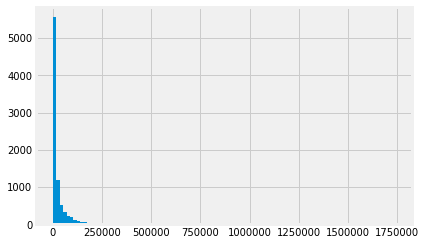

In [ ]:
#The follwoing doesn't help much in terms of visualizing the spends since is not grouped
df_prod4.SPEND.hist(bins=100 );

In [ ]:
#Grouping by Month
df_time_spend = df_prod4.reset_index()
df_time_spend = df_time_spend[['YEAR_MONTH','SPEND']].groupby('YEAR_MONTH').sum()

In [ ]:
#u.set_index(pd.to_datetime(u['date']), inplace=True)
#u.index = u.to_period(freq='Q').index
#u.drop(labels='date', axis=1, inplace=True)
#u.head()

df_time_spend = df_time_spend.reset_index()
df_time_spend.set_index(pd.to_datetime(df_time_spend['YEAR_MONTH']), inplace=True)
df_time_spend.index = df_time_spend.to_period(freq='M').index
df_time_spend.drop(labels='YEAR_MONTH', axis=1, inplace=True)

In [ ]:
df_time_spend.head(5)

,SPEND
YEAR_MONTH,
2018-01,1.863130e+06
2018-02,1.799574e+06
2018-03,2.967806e+06
2018-04,3.606184e+06
2018-05,3.244234e+06


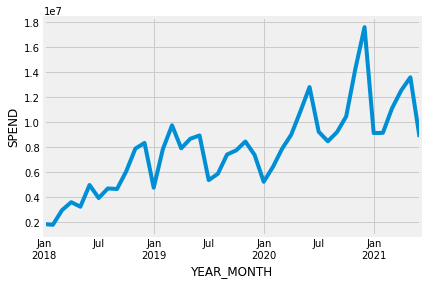

In [ ]:
#Spend Over time
df_time_spend['SPEND'].plot()
plt.ylabel('SPEND')
plt.show();

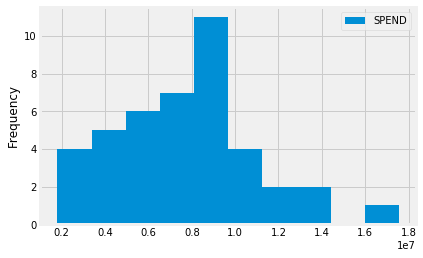

In [ ]:
df_time_spend.plot(kind='hist', bins=10);

In [ ]:
df_time_spend.describe()

,SPEND
count,4.200000e+01
mean,7.845347e+06
std,3.375352e+06
min,1.799574e+06
25%,5.264569e+06
50%,7.888474e+06
75%,9.178267e+06
max,1.756525e+07


> **INSIGHTS**
- Upward trend MoM, but in particular after the deep fall caused by COVID lockdown and economy uncertant

#### Channel Spend Over Time

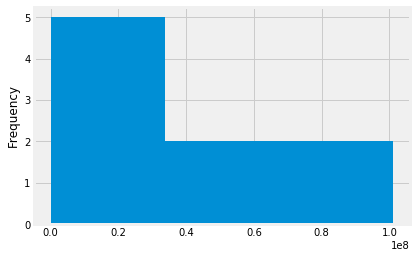

In [ ]:
# # Histogram by TOTAL
df_channel.SPEND.plot(kind='hist', bins=3);

In [ ]:
#Creating a sub data frame for Channels Transpose
df_channelT  = df_prod4.reset_index()
df_channelT = df_channelT.groupby(['YEAR_MONTH','CHANNEL_NAME']).agg({'SPEND' : 'sum'})

In [ ]:
df_channelT

SPEND
YEAR_MONTH CHANNEL_NAME              
2018-01-01 Audio         2.732881e+03
           BVOD          2.038358e+03
           Display       7.947153e+05
           High Impact   1.183772e+04
           Social        3.355352e+03
...                               ...
2021-06-01 High Impact   3.966792e+05
           Native        3.289156e+04
           OOH           3.526057e+04
           Video         1.723496e+06
           YouTube       2.703670e+06

[297 rows x 1 columns]

In [ ]:
#Transposing the Channel Spends
df_channelT = df_channelT.unstack()

In [ ]:
df_channelT.sample(5)

SPEND                                             \
CHANNEL_NAME          Audio          BVOD       Display    High Impact   
YEAR_MONTH                                                               
2018-11-01    156467.947952  9.489067e+05  1.556811e+06   75734.296171   
2019-04-01    220672.713285  9.684329e+05  2.752333e+06   73951.585092   
2021-02-01    319301.108860  2.111783e+06  2.174275e+06  111684.297391   
2019-11-01    138070.528443  1.332378e+06  2.263382e+06   85198.797165   
2021-06-01    264461.220087  1.814982e+06  1.823179e+06  396679.165733   

                                                                             
CHANNEL_NAME        Native           OOH Social         Video       YouTube  
YEAR_MONTH                                                                   
2018-11-01             NaN           NaN    NaN  1.918735e+06  3.220588e+06  
2019-04-01      545.137871           NaN    NaN  2.047436e+06  1.836334e+06  
2021-02-01    62911.333538  74867.853434    NaN  1.414759e+06  2.864411e+06  
2019-11-01    18141.891384           NaN    NaN  1.647396e+06  2.957722e+06  
2021-06-01    32891.562320  35260.567767    NaN  1.723496e+06  2.703670e+06

In [ ]:
#Avoiding the Multiple Index
df_channelT = df_channelT
df_channelT.columns = ['_'.join(col) if type(col) is tuple else col for col in df_channelT.columns.values]
df_channelT.sample(5)

,SPEND_Audio,SPEND_BVOD,SPEND_Display,SPEND_High Impact,SPEND_Native,SPEND_OOH,SPEND_Social,SPEND_Video,SPEND_YouTube
YEAR_MONTH,,,,,,,,,
2019-03-01,243375.436979,1.162251e+06,3.564179e+06,151786.967611,4536.690725,NaN,NaN,3.137784e+06,1.469860e+06
2019-02-01,156534.510798,7.432571e+05,2.933115e+06,24976.714355,NaN,NaN,NaN,2.511843e+06,1.465591e+06
2020-10-01,328166.878535,2.566419e+06,2.711635e+06,97916.522303,59285.626477,NaN,NaN,1.268017e+06,3.414931e+06
2019-05-01,245073.808356,1.009201e+06,3.042177e+06,50043.325279,131338.188052,NaN,NaN,1.955595e+06,2.233021e+06
2020-12-01,672613.196585,3.564590e+06,3.870784e+06,255137.457730,122002.007747,NaN,NaN,3.458863e+06,5.621259e+06


In [ ]:
#Checking nulls 
df_channelT.isnull().sum()

SPEND_Audio           0
SPEND_BVOD            0
SPEND_Display         0
SPEND_High Impact     0
SPEND_Native         14
SPEND_OOH            34
SPEND_Social         33
SPEND_Video           0
SPEND_YouTube         0
dtype: int64

In [ ]:
#Fill null with O on numerical columns
df_channelT.fillna(value='0')

,SPEND_Audio,SPEND_BVOD,SPEND_Display,SPEND_High Impact,SPEND_Native,SPEND_OOH,SPEND_Social,SPEND_Video,SPEND_YouTube
YEAR_MONTH,,,,,,,,,
2018-01-01,2732.881190,2.038358e+03,7.947153e+05,11837.718860,0,0,3355.35,4.784650e+05,5.699857e+05
2018-02-01,26478.041838,3.408336e+04,7.684086e+05,0.161883,0,0,1819.88,4.250869e+05,5.436973e+05
2018-03-01,102105.545246,3.038726e+05,7.534295e+05,0.103492,0,0,13713.3,7.455142e+05,1.049171e+06
2018-04-01,72596.191062,3.311525e+05,7.899331e+05,0.293473,0,0,98706.2,1.329801e+06,9.839950e+05
2018-05-01,57219.197618,2.997845e+05,9.476124e+05,985.531486,0,0,0.0634346,8.366133e+05,1.102019e+06
2018-06-01,80076.346961,6.026020e+05,1.190631e+06,64525.128816,0,0,1153.31,1.371120e+06,1.664080e+06
2018-07-01,39707.872186,5.526079e+05,8.837020e+05,38116.714110,0,0,2213.06,1.310384e+06,1.110209e+06
2018-08-01,117453.753307,4.569430e+05,1.272433e+06,5575.029724,0,0,1031.56,1.563674e+06,1.284592e+06
2018-09-01,173713.729029,4.034661e+05,1.434791e+06,24972.923730,0,0,0.0329748,1.387361e+06,1.230468e+06


In [ ]:
#Creating a sum of total 
df_channelT['TT_SPEND'] = df_channelT.sum(axis=1)

In [ ]:
df_channelT.head()

,SPEND_Audio,SPEND_BVOD,SPEND_Display,SPEND_High Impact,SPEND_Native,SPEND_OOH,SPEND_Social,SPEND_Video,SPEND_YouTube,TT_SPEND
YEAR_MONTH,,,,,,,,,,
2018-01-01,2732.881190,2038.358158,794715.304814,11837.718860,NaN,NaN,3355.351785,4.784650e+05,5.699857e+05,1.863130e+06
2018-02-01,26478.041838,34083.358932,768408.640731,0.161883,NaN,NaN,1819.884512,4.250869e+05,5.436973e+05,1.799574e+06
2018-03-01,102105.545246,303872.587935,753429.467709,0.103492,NaN,NaN,13713.336540,7.455142e+05,1.049171e+06,2.967806e+06
2018-04-01,72596.191062,331152.475181,789933.139259,0.293473,NaN,NaN,98706.189314,1.329801e+06,9.839950e+05,3.606184e+06
2018-05-01,57219.197618,299784.536294,947612.449410,985.531486,NaN,NaN,0.063435,8.366133e+05,1.102019e+06,3.244234e+06


In [ ]:
#Check in if the new data frame has the same results as before
print('ORIGINAL','='*100)
print('SPEND', df_prod4.SPEND.sum())
print('NEW','='*100)
print('SPEND', df_channelT.TT_SPEND.sum())

ORIGINAL ====================================================================================================
SPEND 329504573.1333064
NEW ====================================================================================================
SPEND 329504573.1333064


In [ ]:
#Checking Describe
df_channelT.describe()

,SPEND_Audio,SPEND_BVOD,SPEND_Display,SPEND_High Impact,SPEND_Native,SPEND_OOH,SPEND_Social,SPEND_Video,SPEND_YouTube,TT_SPEND
count,42.000000,4.200000e+01,4.200000e+01,42.000000,28.000000,8.000000,9.000000,4.200000e+01,4.200000e+01,4.200000e+01
mean,247853.475591,1.340704e+06,2.115447e+06,103881.665679,47565.213644,41827.536170,13554.754222,1.589889e+06,2.404990e+06,7.845347e+06
std,181070.613561,9.498591e+05,8.211812e+05,104089.116720,49412.416248,27157.293189,32208.786453,6.271425e+05,1.119999e+06,3.375352e+06
min,2732.881190,2.038358e+03,7.534295e+05,0.103492,447.927093,3231.173538,0.032975,4.250869e+05,5.436973e+05,1.799574e+06
25%,125225.878075,6.049172e+05,1.515396e+06,38809.517464,8444.514226,29726.134791,1031.557861,1.217744e+06,1.477381e+06,5.264569e+06
50%,181328.489987,1.085726e+06,2.103223e+06,74304.789565,33249.971895,40986.221181,1819.884512,1.564196e+06,2.511707e+06,7.888474e+06
75%,332875.998058,1.981263e+06,2.744649e+06,124581.272338,67282.718825,50984.144248,3355.351785,1.896101e+06,2.968040e+06,9.178267e+06
max,672613.196585,3.710476e+06,3.870784e+06,440648.759731,183481.006869,83142.508545,98706.189314,3.458863e+06,5.621259e+06,1.756525e+07


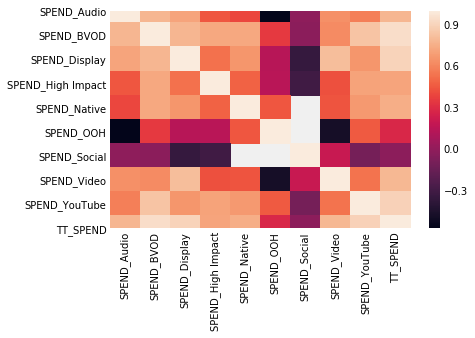

In [ ]:
sns.heatmap(df_channelT.corr());

> **INSIGHTS**
- No doubt Display is the basic channel for any campaign
- Interesting to see that BVOD has more positive correlation between YouTube than Video, especially given from a broad categorical perspective BVOD is part of Video
- High Impact, Audio, OOH are kind of 'nice to have' channels
- High Impact, BVOD and YouTube have high correlation between each other

In [ ]:
df_channelT.corr(method ='pearson')

,SPEND_Audio,SPEND_BVOD,SPEND_Display,SPEND_High Impact,SPEND_Native,SPEND_OOH,SPEND_Social,SPEND_Video,SPEND_YouTube,TT_SPEND
SPEND_Audio,1.000000,0.779614,0.711276,0.443748,0.392685,-0.574902,-0.013886,0.640736,0.579018,0.778766
SPEND_BVOD,0.779614,1.000000,0.781894,0.729126,0.728556,0.352742,-0.021956,0.621643,0.836159,0.941262
SPEND_Display,0.711276,0.781894,1.000000,0.528056,0.655973,0.133829,-0.348548,0.810041,0.659335,0.896113
SPEND_High Impact,0.443748,0.729126,0.528056,1.000000,0.483135,0.141844,-0.306398,0.423337,0.705691,0.711833
SPEND_Native,0.392685,0.728556,0.655973,0.483135,1.000000,0.445712,NaN,0.439701,0.670911,0.751707
SPEND_OOH,-0.574902,0.352742,0.133829,0.141844,0.445712,1.000000,NaN,-0.486029,0.455924,0.276169
SPEND_Social,-0.013886,-0.021956,-0.348548,-0.306398,NaN,NaN,1.000000,0.197368,-0.102675,-0.016057
SPEND_Video,0.640736,0.621643,0.810041,0.423337,0.439701,-0.486029,0.197368,1.000000,0.538398,0.790019
SPEND_YouTube,0.579018,0.836159,0.659335,0.705691,0.670911,0.455924,-0.102675,0.538398,1.000000,0.890352
TT_SPEND,0.778766,0.941262,0.896113,0.711833,0.751707,0.276169,-0.016057,0.790019,0.890352,1.000000


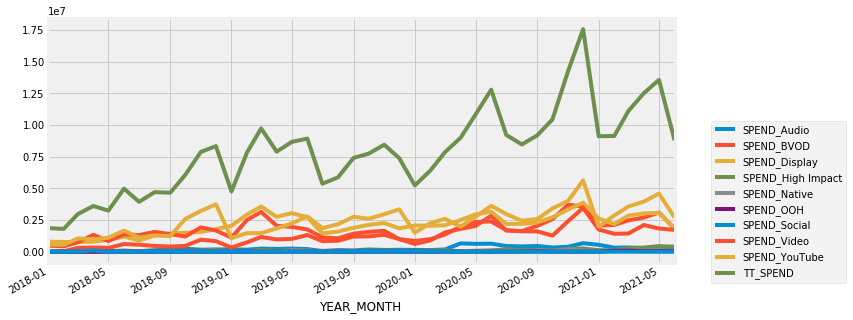

In [ ]:
#Checking the Channel Spend over time
df_channelT.groupby('YEAR_MONTH').sum().sort_values('TT_SPEND').plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

In [ ]:
#Creating a channel view excluding the total 
df_channelT_nott = df_channelT.drop('TT_SPEND',axis=1)

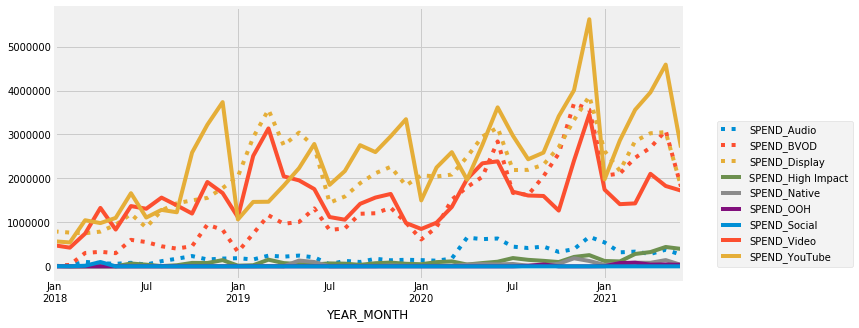

In [ ]:
#Creating Plot
df_channelT_nott.groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5),
                                                  style={'SPEND_Audio':':', 
                                                         'SPEND_BVOD':':',
                                                         'SPEND_Display':':'})
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

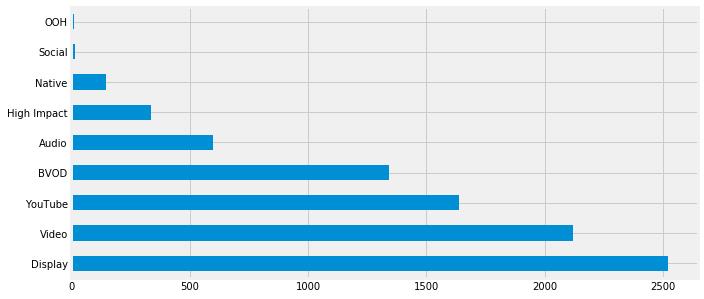

In [ ]:
#ASpend by Media Channel
df_prod4.CHANNEL_NAME.value_counts().plot(kind='barh',figsize=(10,5));

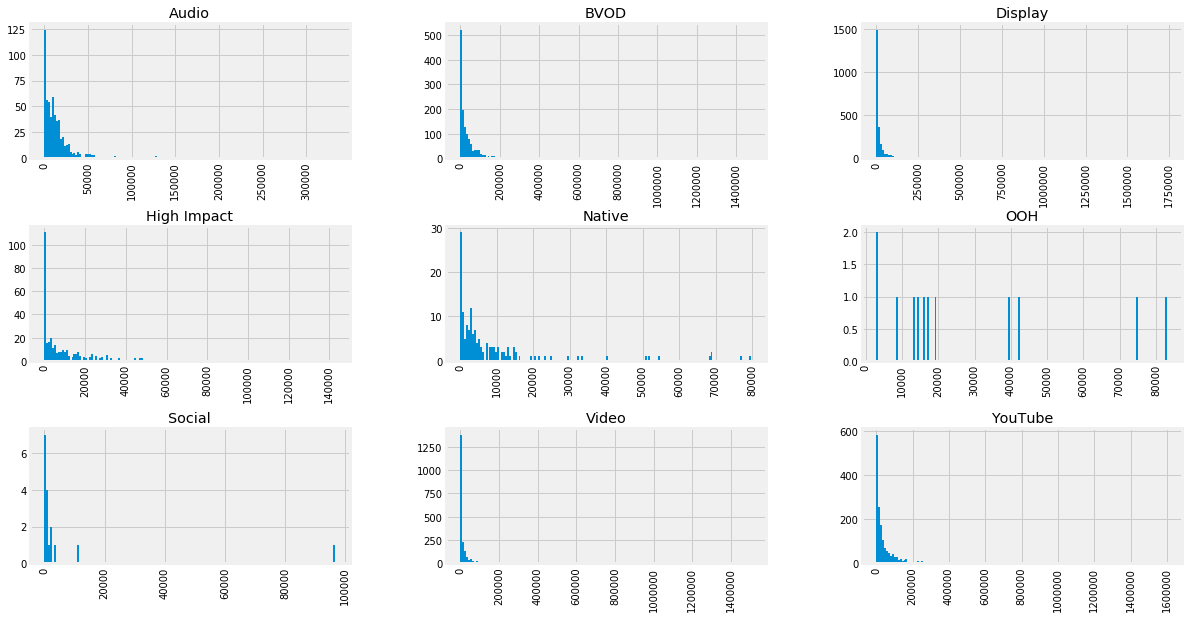

In [ ]:
# Histogram by Channel
df_prod4.hist(bins=150,figsize=(20,10),column='SPEND', by='CHANNEL_NAME');

#### CPM over time

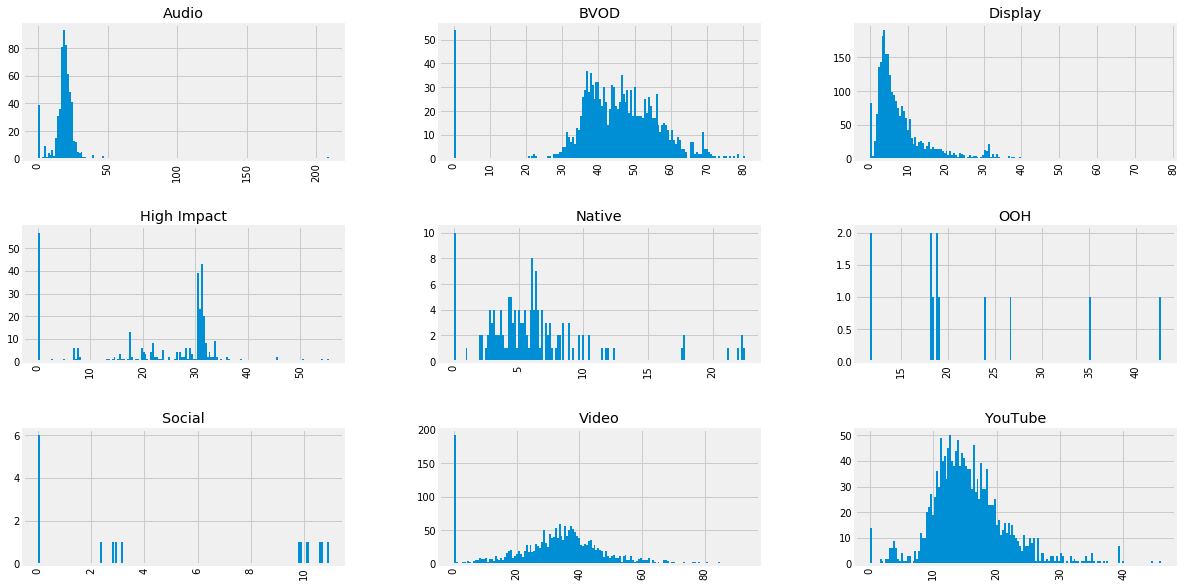

In [ ]:
# Histogram by Channel and CPM
df_prod4.hist(bins=150,figsize=(20,10),column='CPM', by='CHANNEL_NAME');

- CPM on Main Channels - DISPLAY 

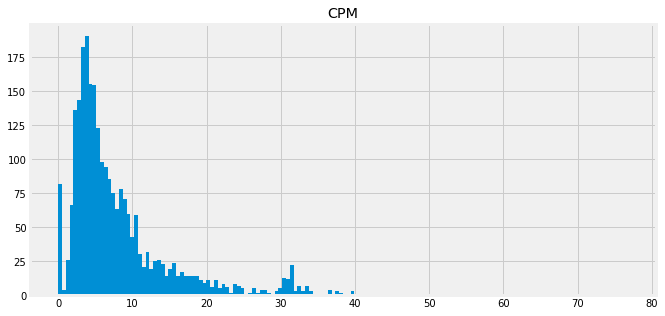

In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
# Histogram 
df_prod4[df_prod4['CHANNEL_NAME']=="Display"].hist(bins=150,figsize=(10,5),
                                                   column='CPM');

In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
# Checking the outliner at 0 which can be excluded just doing a filter
# Example df_industry.sort_values('SPEND',ascending=False)
df_prod4[df_prod4['CHANNEL_NAME']=="Display"].sort_values('CPM',ascending=False).tail(5)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2018-04-01,Savannah Technology,Technology,MIKE,Display,Open Exchange,1,0.004599,0.0
2018-01-01,William NGO and Associations,NGO and Associations,EVE,Display,PMP,3,0.023658,0.0
2018-11-01,Emma Energy and Gas,Energy and Gas,EVE,Display,Open Exchange,2,0.001047,0.0
2019-09-01,Muhammad Retail,Retail,EVE,Display,Open Exchange,8,0.000000,0.0
2018-02-01,Logan Retail,Retail,MIKE,Display,Open Exchange,3,0.004567,0.0


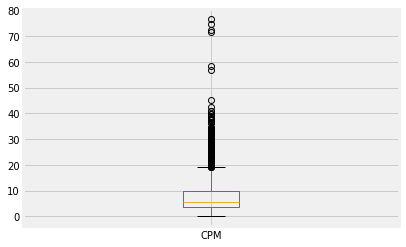

In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
#Box Plot 
df_prod4[df_prod4['CHANNEL_NAME']=="Display"]['CPM'].plot.box();

In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
#Creating a sub data frame
#First filtering only by the channel
df_prod4_display = df_prod4[df_prod4['CHANNEL_NAME']=="Display"]

In [ ]:
df_prod4_display.sample(3)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2020-01-01,Flynn Retail,Retail,EVE,Display,PMP,21263612,138904.319575,6.532489
2021-06-01,Kai Energy and Gas,Energy and Gas,EVE,Display,Open Exchange,2118056,7336.378753,3.463732
2018-05-01,Eliza Government,Government,MIKE,Display,Open Exchange,8298209,36667.425720,4.418716


In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
#Disregarding non essenctial collumns
df_prod4_display = df_prod4_display[['IMPRESSIONS', 'SPEND']].groupby('YEAR_MONTH',).agg({'IMPRESSIONS' : 'sum','SPEND' : 'sum'})

In [ ]:
df_prod4_display.sample(3)

,IMPRESSIONS,SPEND
YEAR_MONTH,,
2021-03-01,694333843,2.850051e+06
2018-07-01,208010370,8.837020e+05
2020-03-01,468319998,2.087795e+06


In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
#Adding a CPM 
df_prod4_display['CPM'] = df_prod4_display.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)  

In [ ]:
df_prod4_display.sample(3)

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2019-08-01,300994588,1.589255e+06,5.280013
2019-06-01,606112731,2.721595e+06,4.490245
2019-07-01,294042887,1.448661e+06,4.926701


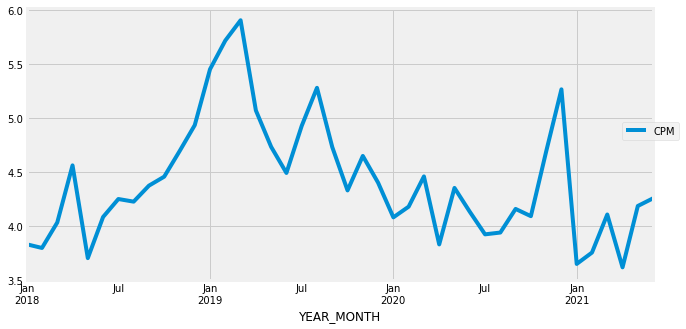

In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
# Ploting over time

df_prod4_display.CPM.plot(kind='line',figsize=(10,5) )
                                                
plt.legend(bbox_to_anchor = ( 1.05, 0.6))
plt.show;

In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
# Checking what was the CPM in 2019-03 which was the highest in this history
df_prod4_display.loc['2018-12-01':'2019-06-01']

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018-12-01,360824665,1.780249e+06,4.933834
2019-01-01,374883287,2.044099e+06,5.452628
2019-02-01,512916817,2.933115e+06,5.718500
2019-03-01,603402929,3.564179e+06,5.906798
2019-04-01,542814955,2.752333e+06,5.070482
2019-05-01,642827463,3.042177e+06,4.732494
2019-06-01,606112731,2.721595e+06,4.490245


In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
df_prod4_display.describe()

,IMPRESSIONS,SPEND,CPM
count,4.200000e+01,4.200000e+01,42.000000
mean,4.806464e+08,2.115447e+06,4.410513
std,1.834115e+08,8.211812e+05,0.552937
min,1.732076e+08,7.534295e+05,3.614479
25%,3.290895e+08,1.515396e+06,4.079137
50%,4.894535e+08,2.103223e+06,4.291718
75%,6.336488e+08,2.744649e+06,4.690368
max,8.376601e+08,3.870784e+06,5.906798


In [ ]:
# Analysing the Main Channels only
# DISPLAY CPM ONLY
# TOTAL SPENDS YoY
print('2018: ${:,.2f}'.format(df_prod4_display.SPEND.loc['2018-01-01':'2018-12-01'].sum()))
print('2018 vs 2019: {:.0%}'.format((df_prod4_display.SPEND.loc['2019-01-01':'2019-12-01'].sum())/(df_prod4_display.SPEND.loc['2018-01-01':'2018-12-01'].sum())-1))
print('2019: ${:,.2f}'.format(df_prod4_display.SPEND.loc['2019-01-01':'2019-12-01'].sum()))
print('2019 vs 2020: {:.0%}'.format((df_prod4_display.SPEND.loc['2020-01-01':'2020-12-01'].sum())/(df_prod4_display.SPEND.loc['2019-01-01':'2019-12-01'].sum())-1))
print('JAN-MAY 2020: ${:,.2f}'.format(df_prod4_display.SPEND.loc['2020-01-01':'2020-05-01'].sum()))
print('JAN-MAY 2021 vs 2021: {:.0%}'.format((df_prod4_display.SPEND.loc['2021-01-01':'2021-05-01'].sum())/(df_prod4_display.SPEND.loc['2020-01-01':'2020-05-01'].sum())-1))
print('JAN-MAY 2021: ${:,.2f}'.format(df_prod4_display.SPEND.loc['2021-01-01':'2021-05-01'].sum()))

2018: $13,674,306.16
2018 vs 2019: 106%
2019: $28,209,101.62
2019 vs 2020: 11%
JAN-MAY 2020: $11,646,561.12
JAN-MAY 2021 vs 2021: 18%
JAN-MAY 2021: $13,729,676.69


- CPM and Main Channels - BVOD

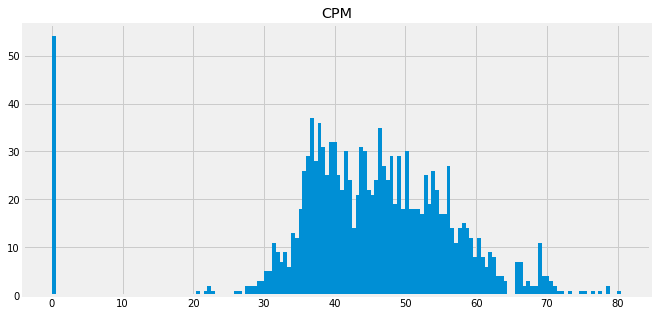

In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
# Histogram 
df_prod4[df_prod4['CHANNEL_NAME']=="BVOD"].hist(bins=150,figsize=(10,5),
                                                   column='CPM');

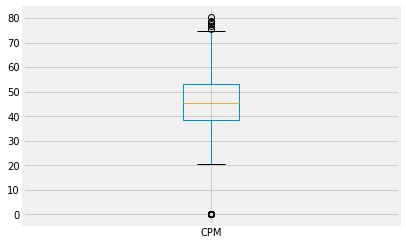

In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
# Box Plot 
df_prod4[df_prod4['CHANNEL_NAME']=="BVOD"]['CPM'].plot.box();

In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
#Creating a sub data frame

#First filtering only by the channel
df_prod4_bvod = df_prod4[df_prod4['CHANNEL_NAME']=="BVOD"]

#Disregarding non essenctial collumns
df_prod4_bvod = df_prod4_bvod[['IMPRESSIONS', 'SPEND']].groupby('YEAR_MONTH',).agg({'IMPRESSIONS' : 'sum','SPEND' : 'sum'})

#Adding a CPM 
df_prod4_bvod['CPM'] = df_prod4_bvod.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)  

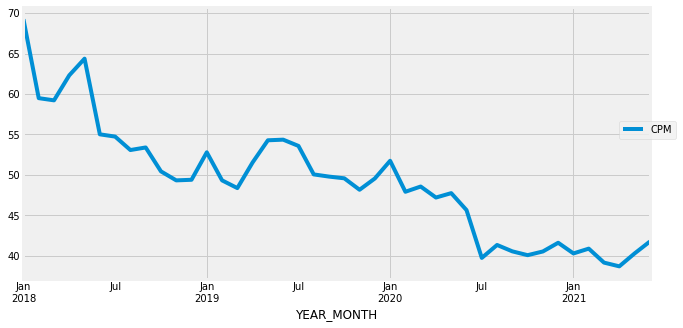

In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
# Ploting over time

df_prod4_bvod.CPM.plot(kind='line',figsize=(10,5) )
                                                
plt.legend(bbox_to_anchor = ( 1.05, 0.6))
plt.show;

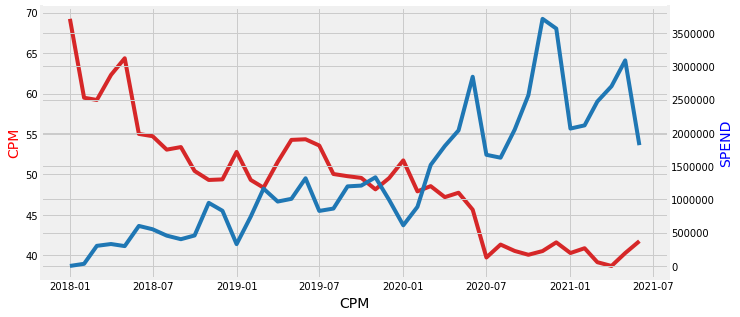

In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
# Ploting over time CPM vs Spend

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,5))
# make a plot
ax.plot(df_prod4_bvod.index.values, df_prod4_bvod.CPM, color='tab:red')
# set x-axis label
ax.set_xlabel("CPM",fontsize=14)
# set y-axis label
ax.set_ylabel("CPM",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_prod4_bvod.index.values, df_prod4_bvod.SPEND,color='tab:blue')
ax2.set_ylabel("SPEND",color="blue",fontsize=14)

plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
# TOTAL SPENDS YoY
print('2018: ${:,.2f}'.format(df_prod4_bvod.SPEND.loc['2018-01-01':'2018-12-01'].sum()))
print('2018 vs 2019: {:.0%}'.format((df_prod4_bvod.SPEND.loc['2019-01-01':'2019-12-01'].sum())/(df_prod4_bvod.SPEND.loc['2018-01-01':'2018-12-01'].sum())-1))
print('2019: ${:,.2f}'.format(df_prod4_bvod.SPEND.loc['2019-01-01':'2019-12-01'].sum()))
print('2019 vs 2020: {:.0%}'.format((df_prod4_bvod.SPEND.loc['2020-01-01':'2020-12-01'].sum())/(df_prod4_bvod.SPEND.loc['2019-01-01':'2019-12-01'].sum())-1))
print('2020: ${:,.2f}'.format(df_prod4_bvod.SPEND.loc['2020-01-01':'2020-12-01'].sum()))
print('JAN-MAY 2020: ${:,.2f}'.format(df_prod4_bvod.SPEND.loc['2020-01-01':'2020-05-01'].sum()))
print('JAN-MAY 2021 vs 2021: {:.0%}'.format((df_prod4_bvod.SPEND.loc['2021-01-01':'2021-05-01'].sum())/(df_prod4_bvod.SPEND.loc['2020-01-01':'2020-05-01'].sum())-1))
print('JAN-MAY 2021: ${:,.2f}'.format(df_prod4_bvod.SPEND.loc['2021-01-01':'2021-05-01'].sum()))

2018: $5,224,881.61
2018 vs 2019: 129%
2019: $11,950,783.61
2019 vs 2020: 108%
2020: $24,886,252.90
JAN-MAY 2020: $6,857,831.90
JAN-MAY 2021 vs 2021: 81%
JAN-MAY 2021: $12,432,673.81


In [ ]:
print('2018 vs 2019: {:.0%}'.format((df_prod4_bvod.SPEND.loc['2019-01-01':'2019-12-01'].sum())/(df_prod4_bvod.SPEND.loc['2018-01-01':'2018-12-01'].sum())-1))

2018 vs 2019: 129%


In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
# Analysing the Main Channels only
# BVOD CPM ONLY
# Describe for the total period
df_prod4_bvod.describe()

,IMPRESSIONS,SPEND,CPM
count,4.200000e+01,4.200000e+01,42.000000
mean,3.019096e+07,1.340704e+06,49.156436
std,2.426630e+07,9.498591e+05,7.273640
min,2.943700e+04,2.038358e+03,38.672573
25%,1.117310e+07,6.049172e+05,41.628330
50%,2.203749e+07,1.085726e+06,49.347274
75%,4.327899e+07,1.981263e+06,53.301902
max,9.158392e+07,3.710476e+06,69.244765


In [ ]:
# Analysing the Main Channels only
# BVOD CPM ONLY
# Describe for ONLY the first 6months of 2021
df_prod4_bvod.loc['2021-01-01':'2021-06-01'].describe()

,IMPRESSIONS,SPEND,CPM
count,6.000000e+00,6.000000e+00,6.000000
mean,5.933408e+07,2.374609e+06,40.158468
std,1.264567e+07,4.692927e+05,1.121039
min,4.348190e+07,1.814982e+06,38.672573
25%,5.136013e+07,2.076004e+06,39.417617
50%,5.740112e+07,2.291049e+06,40.269392
75%,6.812706e+07,2.641937e+06,40.715855
max,7.667153e+07,3.087354e+06,41.741086


In [ ]:
df_prod4_bvod.loc['2021-01-01':'2021-06-01']

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2021-01-01,51254052,2.064078e+06,40.271501
2021-02-01,51678359,2.111783e+06,40.863972
2021-03-01,63123883,2.470315e+06,39.134395
2021-04-01,69794787,2.699144e+06,38.672573
2021-05-01,76671530,3.087354e+06,40.267283
2021-06-01,43481898,1.814982e+06,41.741086


- CPM and Main Channels - VIDEO

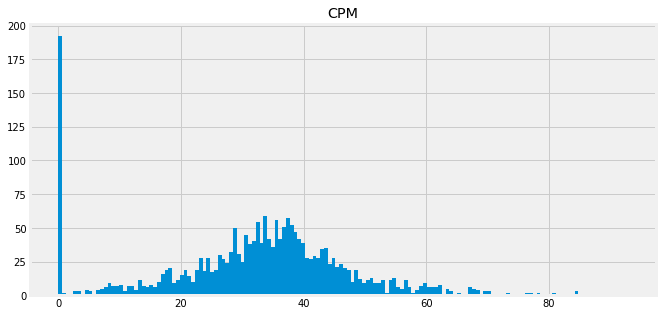

In [ ]:
# Analysing the Main Channels only
# VIDEO CPM ONLY
# Histogram 
df_prod4[df_prod4['CHANNEL_NAME']=="Video"].hist(bins=150,figsize=(10,5),
                                                   column='CPM');

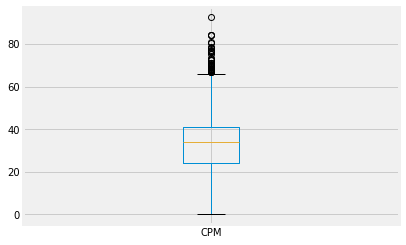

In [ ]:
# Analysing the Main Channels only
# VIDEO CPM ONLY
# Box Plot
df_prod4[df_prod4['CHANNEL_NAME']=="Video"]['CPM'].plot.box();

In [ ]:
# Analysing the Main Channels only
# VIDEO 
# Checking the outliner at 0 which can be excluded just doing a filter
# Example df_industry.sort_values('SPEND',ascending=False)
df_prod4[df_prod4['CHANNEL_NAME']=="Video"].sort_values('CPM',ascending=True).head(5)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2020-04-01,Emma Energy and Gas,Energy and Gas,EVE,Video,PMP,7,0.054600,0.0
2019-08-01,Arlo Retail,Retail,EVE,Video,PMP,3,0.027988,0.0
2020-07-01,Eli Real Estate,Real Estate,MIKE,Video,PMP,20,0.100002,0.0
2019-02-01,Cooper Technology,Technology,MIKE,Video,Open Exchange,1,0.021454,0.0
2019-08-01,Carter Real Estate,Real Estate,EVE,Video,PMP,15,0.641818,0.0


In [ ]:
# Analysing the Main Channels only
# VIDEO
#Creating a sub data frame
#First filtering only by the channel
df_prod4_video = df_prod4[df_prod4['CHANNEL_NAME']=="Video"]

In [ ]:
df_prod4_video.sample(3)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2021-06-01,Eli Real Estate,Real Estate,EVE,Video,PMP,11,0.444673,0.000000
2019-04-01,Billie Others,Others,MIKE,Video,PMP,88732,2283.241236,25.731881
2018-12-01,Audrey Technology,Technology,MIKE,Video,PMP,345777,17774.814983,51.405429


In [ ]:
# Analysing the Main Channels only
# VIDEO
#Disregarding non essenctial collumns
df_prod4_video = df_prod4_video[['IMPRESSIONS', 'SPEND']].groupby('YEAR_MONTH',).agg({'IMPRESSIONS' : 'sum','SPEND' : 'sum'})

In [ ]:
df_prod4_video.sample(3)

,IMPRESSIONS,SPEND
YEAR_MONTH,,
2018-10-01,44064749,1.200987e+06
2019-02-01,83526192,2.511843e+06
2018-08-01,55866077,1.563674e+06


In [ ]:
# Analysing the Main Channels only
# VIDEO
#Adding a CPM 
df_prod4_video['CPM'] = df_prod4_video.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)  

In [ ]:
df_prod4_video.sample(3)

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2021-05-01,56718278,1.828198e+06,32.232963
2019-09-01,46552092,1.422120e+06,30.549003
2020-03-01,42458307,1.351793e+06,31.838139


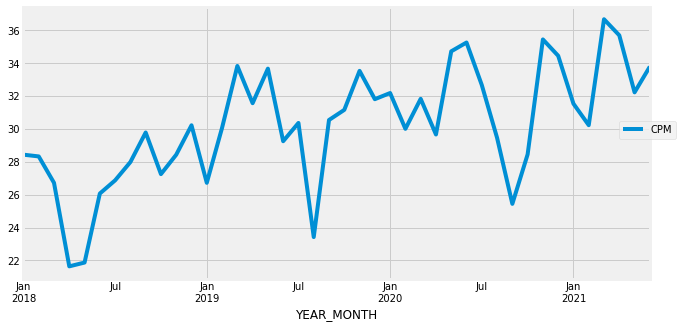

In [ ]:
# Analysing the Main Channels only
# VIDEO
# Ploting over time

df_prod4_video.CPM.plot(kind='line',figsize=(10,5) )
                                                
plt.legend(bbox_to_anchor = ( 1.05, 0.6))
plt.show;

In [ ]:
df_prod4_video.describe()

,IMPRESSIONS,SPEND,CPM
count,4.200000e+01,4.200000e+01,42.000000
mean,5.201313e+07,1.589889e+06,30.226184
std,1.744368e+07,6.271425e+05,3.593831
min,1.500388e+07,4.250869e+05,21.640563
25%,4.285992e+07,1.217744e+06,28.358093
50%,5.146772e+07,1.564196e+06,30.230483
75%,6.110923e+07,1.896101e+06,32.566791
max,1.003793e+08,3.458863e+06,36.681464


In [ ]:
# Analysing the Main Channels only
# Video CPM ONLY
# TOTAL SPENDS YoY
print('2018: ${:,.2f}'.format(df_prod4_video.SPEND.loc['2018-01-01':'2018-12-01'].sum()))
print('2018 vs 2019: {:.0%}'.format((df_prod4_video.SPEND.loc['2019-01-01':'2019-12-01'].sum())/(df_prod4_video.SPEND.loc['2018-01-01':'2018-12-01'].sum())-1))
print('2019: ${:,.2f}'.format(df_prod4_video.SPEND.loc['2019-01-01':'2019-12-01'].sum()))
print('2019 vs 2020: {:.0%}'.format((df_prod4_video.SPEND.loc['2020-01-01':'2020-12-01'].sum())/(df_prod4_video.SPEND.loc['2019-01-01':'2019-12-01'].sum())-1))
print('2020: ${:,.2f}'.format(df_prod4_video.SPEND.loc['2020-01-01':'2020-12-01'].sum()))
print('JAN-MAY 2020: ${:,.2f}'.format(df_prod4_video.SPEND.loc['2020-01-01':'2020-05-01'].sum()))
print('JAN-MAY 2021 vs 2021: {:.0%}'.format((df_prod4_video.SPEND.loc['2021-01-01':'2021-05-01'].sum())/(df_prod4_video.SPEND.loc['2020-01-01':'2020-05-01'].sum())-1))
print('JAN-MAY 2021: ${:,.2f}'.format(df_prod4_video.SPEND.loc['2021-01-01':'2021-05-01'].sum()))

2018: $14,234,949.40
2018 vs 2019: 43%
2019: $20,333,419.28
2019 vs 2020: 8%
2020: $21,957,267.73
JAN-MAY 2020: $7,525,738.54
JAN-MAY 2021 vs 2021: 13%
JAN-MAY 2021: $8,526,210.56


- CPM and Main Channels - YOUTUBE

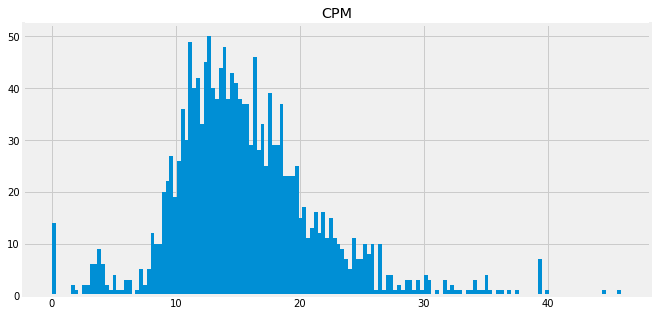

In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
# Histogram
df_prod4[df_prod4['CHANNEL_NAME']=="YouTube"].hist(bins=150,figsize=(10,5),
                                                   column='CPM');

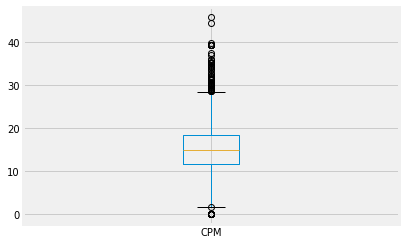

In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
# Box Plot 
df_prod4[df_prod4['CHANNEL_NAME']=="YouTube"]['CPM'].plot.box();

In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
#Creating a sub data frame
#First filtering only by the channel
df_prod4_youtube = df_prod4[df_prod4['CHANNEL_NAME']=="YouTube"]

In [ ]:
df_prod4_youtube.sample(3)

,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2019-05-01,"Max Finance, Bank and Insurance","Finance, Bank and Insurance",EVE,YouTube,Open Exchange,5369060,76412.710274,14.232046
2021-02-01,Florence Beverage,Beverage,MIKE,YouTube,Open Exchange,9457203,107199.866985,11.335261
2020-06-01,Florence Beverage,Beverage,MIKE,YouTube,Open Exchange,5781389,91425.595559,15.813777


In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
#Disregarding non essenctial collumns
df_prod4_youtube = df_prod4_youtube[['IMPRESSIONS', 'SPEND']].groupby('YEAR_MONTH',).agg({'IMPRESSIONS' : 'sum','SPEND' : 'sum'})

In [ ]:
df_prod4_youtube.sample(3)

,IMPRESSIONS,SPEND
YEAR_MONTH,,
2019-03-01,115592206,1.469860e+06
2020-08-01,204946644,2.436190e+06
2020-05-01,220203825,2.761078e+06


In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
#Adding a CPM 
df_prod4_youtube['CPM'] = df_prod4_youtube.apply(lambda x: cpm_function(x['IMPRESSIONS'],x['SPEND']), axis=1)  

In [ ]:
df_prod4_youtube.sample(3)

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018-08-01,110931796,1.284592e+06,11.580015
2019-07-01,137356772,1.853859e+06,13.496670
2020-07-01,231364020,2.971480e+06,12.843309


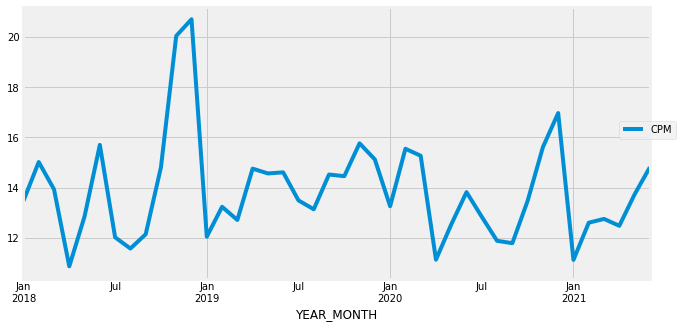

In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
# Ploting over time

df_prod4_youtube.CPM.plot(kind='line',figsize=(10,5) )
                                                
plt.legend(bbox_to_anchor = ( 1.05, 0.6))
plt.show;

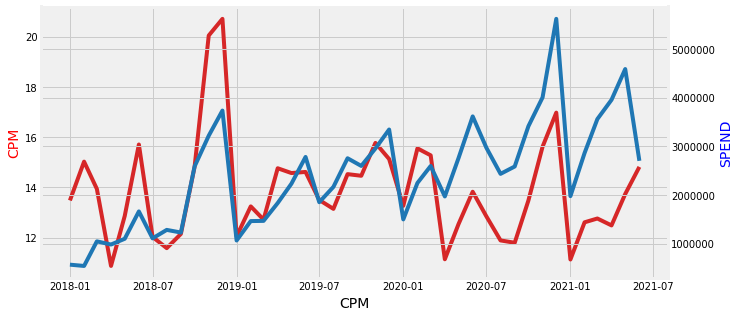

In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
# Ploting over time CPM vs Spend
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,5))
# make a plot
ax.plot(df_prod4_youtube.index.values, df_prod4_youtube.CPM, color='tab:red')
# set x-axis label
ax.set_xlabel("CPM",fontsize=14)
# set y-axis label
ax.set_ylabel("CPM",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_prod4_youtube.index.values, df_prod4_youtube.SPEND,color='tab:blue')
ax2.set_ylabel("SPEND",color="blue",fontsize=14)

plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

In [ ]:
# Analysing the Main Channels only
# YOUTUBE CPM ONLY
df_prod4_youtube.describe()

,IMPRESSIONS,SPEND,CPM
count,4.200000e+01,4.200000e+01,42.000000
mean,1.719353e+08,2.404990e+06,13.889477
std,7.359997e+07,1.119999e+06,2.068274
min,3.619214e+07,5.436973e+05,10.871226
25%,1.114704e+08,1.477381e+06,12.556019
50%,1.758827e+08,2.511707e+06,13.487353
75%,2.199936e+08,2.968040e+06,14.814443
max,3.342038e+08,5.621259e+06,20.705505


In [ ]:
# Analysing the Main Channels only
# YouTube CPM ONLY
# TOTAL SPENDS YoY
print('2018: ${:,.2f}'.format(df_prod4_youtube.SPEND.loc['2018-01-01':'2018-12-01'].sum()))
print('2018 vs 2019: {:.0%}'.format((df_prod4_youtube.SPEND.loc['2019-01-01':'2019-12-01'].sum())/(df_prod4_youtube.SPEND.loc['2018-01-01':'2018-12-01'].sum())-1))
print('2019: ${:,.2f}'.format(df_prod4_youtube.SPEND.loc['2019-01-01':'2019-12-01'].sum()))
print('2019 vs 2020: {:.0%}'.format((df_prod4_youtube.SPEND.loc['2020-01-01':'2020-12-01'].sum())/(df_prod4_youtube.SPEND.loc['2019-01-01':'2019-12-01'].sum())-1))
print('2020: ${:,.2f}'.format(df_prod4_youtube.SPEND.loc['2020-01-01':'2020-12-01'].sum()))
print('JAN-MAY 2020: ${:,.2f}'.format(df_prod4_youtube.SPEND.loc['2020-01-01':'2020-05-01'].sum()))
print('JAN-MAY 2021 vs 2021: {:.0%}'.format((df_prod4_youtube.SPEND.loc['2021-01-01':'2021-05-01'].sum())/(df_prod4_youtube.SPEND.loc['2020-01-01':'2020-05-01'].sum())-1))
print('JAN-MAY 2021: ${:,.2f}'.format(df_prod4_youtube.SPEND.loc['2021-01-01':'2021-05-01'].sum()))

2018: $19,083,653.39
2018 vs 2019: 39%
2019: $26,537,293.30
2019 vs 2020: 35%
2020: $35,734,044.73
JAN-MAY 2020: $11,079,619.51
JAN-MAY 2021 vs 2021: 53%
JAN-MAY 2021: $16,950,902.65


- Additional Analysis for all channels

In [ ]:
#Standard Deviation
print('STANDARD DEVIATION')
print('Display: {:,.2f}'.format(df_prod4_display.CPM.std()))
print('BVOD: {:,.2f}'.format(df_prod4_bvod.CPM.std()))
print('Video: {:,.2f}'.format(df_prod4_video.CPM.std()))
print('YouTube: {:,.2f}'.format(df_prod4_youtube.CPM.std()))

STANDARD DEVIATION
Display: 0.55
BVOD: 7.27
Video: 3.59
YouTube: 2.07


In [ ]:
#Increase YoY - DISPLAY
(df_prod4_display.groupby(df_prod4_display.index.year).sum()).pct_change(axis='rows')

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018,NaN,NaN,NaN
2019,0.780949,1.062927,0.172089
2020,0.293926,0.113560,-0.144146
2021,-0.456460,-0.504883,-0.538847


In [ ]:
#Increase YoY - BVOD
(df_prod4_bvod.groupby(df_prod4_bvod.index.year).sum()).pct_change(axis='rows')

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018,NaN,NaN,NaN
2019,1.403914,1.287283,-0.100987
2020,1.451747,1.082395,-0.128916
2021,-0.384208,-0.427489,-0.547470


In [ ]:
#Increase YoY - VIDEO
(df_prod4_video.groupby(df_prod4_video.index.year).sum()).pct_change(axis='rows')

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018,NaN,NaN,NaN
2019,0.245992,0.428415,0.130862
2020,0.039766,0.079861,0.037302
2021,-0.551553,-0.533198,-0.472706


In [ ]:
#Increase YoY - YOUTUBE
(df_prod4_youtube.groupby(df_prod4_youtube.index.year).sum()).pct_change(axis='rows')

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018,NaN,NaN,NaN
2019,0.483395,0.390577,-0.027256
2020,0.386257,0.346560,-0.025464
2021,-0.412520,-0.449976,-0.527790


- BVOD vs YouTube

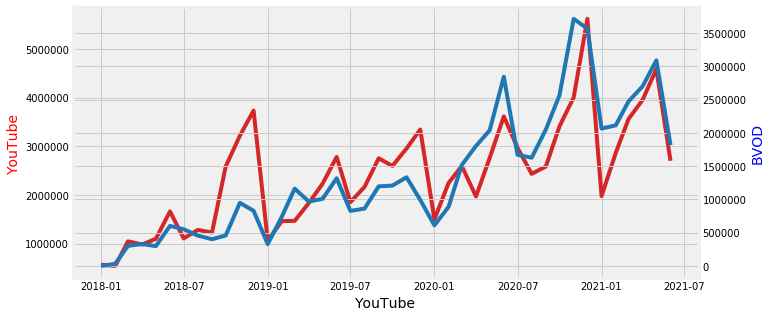

In [ ]:
# Analysing the Main Channels only
# BVOD vs YouTube 
# Ploting over time CPM vs Spend
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,5))
# make a plot
ax.plot(df_prod4_youtube.index.values, df_prod4_youtube.SPEND, color='tab:red')
# set x-axis label
ax.set_xlabel("YouTube",fontsize=14)
# set y-axis label
ax.set_ylabel("YouTube",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_prod4_youtube.index.values, df_prod4_bvod.SPEND,color='tab:blue')
ax2.set_ylabel("BVOD",color="blue",fontsize=14)

plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

> **INSIGHTS**
- Display is a stablished channel, representing 26% total Spend and is present in majority of campaigns, from digital savvy clients to the most traditional ones do utilize. And in addition to this there is a vast inventory availability. Therefore, no surprises in seeing a low standard deviation (below 0.). 
- BVOD (Broadcasting Video On Demand such as 7Plus) is a rapidly growing channel. Spend has increase more than 100% YoY  (the closest is volume of Spend is YouTube but with  only 30% YoY) as a result of advertisers moving budget away from traditional TV into digital to follow up new consumer content consumption. Due to it’s premium format and environment the CPM is considerably higher compared to other channels and has the highest standard deviation (7.27) compared to Display. Interesting to see how the CPM vs Spend simply crossed paths during COVID restrictions, which CPMs going down (rough 10% YoY and spends up.
- Video: Generally speaking is all the online video inventory that is not considered BVOD. Nonetheless represents 20% of total spend, followed close by BVOD 17% which advertisers, in general, see more value due to the high completion rate and premium inventory. 
- YouTube: Main advantage is their capabilities to handle high volume of campaigns with low or no issues with inventory, meanwhile keeping a steady CPM (average -2.6% YoY) with the second lowest standard deviation (2.07) only behind Display. 


#### Industry Spend over time

In [ ]:
#Creating a sub data frame for Channels Transpose
df_industryT  = df_prod4.reset_index()
df_industryT = df_industryT.groupby(['YEAR_MONTH','INDUSTRY']).agg({'SPEND' : 'sum'})

In [ ]:
df_industryT.sample(3)

,,SPEND
YEAR_MONTH,INDUSTRY,
2021-05-01,Automotive,60585.198564
2018-06-01,Tourism,100051.573752
2018-01-01,"Finance, Bank and Insurance",174853.234645


In [ ]:
#Transposing the Channel Spends
df_industryT = df_industryT.unstack()
df_industryT.sample(3)

SPEND                                             \
INDUSTRY   Art and Entertainment    Automotive      Beverage   Broadcasting   
YEAR_MONTH                                                                    
2020-10-01           4107.881079  12042.805223  1.098416e+06  106961.252355   
2021-01-01           5180.948328  30804.839167  5.430059e+05            NaN   
2020-01-01          12458.017596  99279.887366  2.131870e+05   51111.807676   

                                                                           \
INDUSTRY   Broadcasting and Telecommunications  Consulting      Education   
YEAR_MONTH                                                                  
2020-10-01                                 NaN  187.507318  633785.389526   
2021-01-01                         3231.173538         NaN  748071.288284   
2020-01-01                                 NaN         NaN  171798.938103   

                                                                      \
INDUSTRY   Energy and Gas           FMCG Finance, Bank and Insurance   
YEAR_MONTH                                                             
2020-10-01  503107.177333  125266.057937               709838.144328   
2021-01-01  273283.500161   43268.686141               596561.069132   
2020-01-01  376151.698451            NaN               489998.304255   

                                                                      \
INDUSTRY    Food Services         Goods    Government  Multinational   
YEAR_MONTH                                                             
2020-10-01  387240.154201  1.376759e+06  1.757795e+06  794450.956619   
2021-01-01  879233.966809  1.046199e+05  3.968361e+06  270580.876568   
2020-01-01            NaN  1.079717e+05  1.977370e+06  580155.554609   

                                                                          \
INDUSTRY   NGO and Associations       Others   Real Estate        Retail   
YEAR_MONTH                                                                 
2020-10-01        142933.921175          NaN  23212.566863  2.059596e+06   
2021-01-01         89353.627702  3675.582902  18912.210982  7.065369e+05   
2020-01-01         33205.486428          NaN  39970.104379  4.604132e+05   

                                                             
INDUSTRY       Technology        Tourism    Transport Union  
YEAR_MONTH                                                   
2020-10-01  452769.207529  248587.910952  9314.043501   NaN  
2021-01-01  287186.173275  539665.032609  3246.300120   NaN  
2020-01-01  158661.917651  455297.087256  3977.885838   NaN

In [ ]:
#Avoiding the Multiple Index
df_industryT = df_industryT
df_industryT.columns = ['_'.join(col) if type(col) is tuple else col for col in df_industryT.columns.values]
#Creating a sum of total 
df_industryT['TT_SPEND'] = df_industryT.sum(axis=1)
df_industryT.sample(3)

,SPEND_Art and Entertainment,SPEND_Automotive,SPEND_Beverage,SPEND_Broadcasting,SPEND_Broadcasting and Telecommunications,SPEND_Consulting,SPEND_Education,SPEND_Energy and Gas,SPEND_FMCG,"SPEND_Finance, Bank and Insurance",SPEND_Food Services,SPEND_Goods,SPEND_Government,SPEND_Multinational,SPEND_NGO and Associations,SPEND_Others,SPEND_Real Estate,SPEND_Retail,SPEND_Technology,SPEND_Tourism,SPEND_Transport,SPEND_Union,TT_SPEND
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,,,
2020-07-01,NaN,175612.744053,4.082082e+05,NaN,NaN,22613.64120,494873.902743,110061.437686,64668.639815,805545.289062,3.626869e+05,1.851373e+06,2.797909e+06,4.156253e+05,139949.085063,NaN,20285.412380,6.820596e+05,7.885301e+05,80262.400335,NaN,NaN,9.220265e+06
2018-09-01,4329.845178,NaN,1.420158e+05,NaN,1282.325131,NaN,86169.791031,181016.755648,NaN,265607.401251,2.028531e+04,2.358495e+04,1.650624e+06,1.242371e+06,77889.442414,4113.402333,22228.988581,5.165650e+05,3.615473e+05,48239.636808,6901.626694,NaN,4.654772e+06
2020-12-01,9901.393137,6967.250119,3.238972e+06,NaN,113175.657686,0.06223,670457.536214,416521.870216,72581.803446,633220.776305,1.176417e+06,5.375787e+05,4.278743e+06,1.343920e+06,194349.070701,7204.300054,31631.309661,2.695786e+06,1.395646e+06,729007.528785,13167.417786,NaN,1.756525e+07


In [ ]:
#Fill null with O on numerical columns
df_industryT.fillna(value='0')
df_industryT.sample(3)

,SPEND_Art and Entertainment,SPEND_Automotive,SPEND_Beverage,SPEND_Broadcasting,SPEND_Broadcasting and Telecommunications,SPEND_Consulting,SPEND_Education,SPEND_Energy and Gas,SPEND_FMCG,"SPEND_Finance, Bank and Insurance",SPEND_Food Services,SPEND_Goods,SPEND_Government,SPEND_Multinational,SPEND_NGO and Associations,SPEND_Others,SPEND_Real Estate,SPEND_Retail,SPEND_Technology,SPEND_Tourism,SPEND_Transport,SPEND_Union,TT_SPEND
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,,,
2018-09-01,4329.845178,NaN,1.420158e+05,NaN,1282.325131,NaN,86169.791031,181016.755648,NaN,265607.401251,20285.306610,2.358495e+04,1.650624e+06,1.242371e+06,77889.442414,4113.402333,22228.988581,5.165650e+05,361547.297059,48239.636808,6901.626694,NaN,4.654772e+06
2020-10-01,4107.881079,12042.805223,1.098416e+06,106961.252355,NaN,187.507318,633785.389526,503107.177333,125266.057937,709838.144328,387240.154201,1.376759e+06,1.757795e+06,7.944510e+05,142933.921175,NaN,23212.566863,2.059596e+06,452769.207529,248587.910952,9314.043501,NaN,1.044637e+07
2020-04-01,NaN,9282.907769,1.358554e+05,0.000000,NaN,NaN,310436.549423,313592.754873,NaN,481286.717697,135079.486705,8.010693e+05,5.097300e+06,4.027433e+05,30656.880227,NaN,53781.421311,7.187495e+05,481482.610629,4887.455979,10781.985071,NaN,8.986986e+06


In [ ]:
#Check in if the new data frame has the same results as before
print('ORIGINAL','='*100)
print('SPEND', df_prod4.SPEND.sum())
print('NEW','='*100)
print('SPEND', df_industryT.TT_SPEND.sum())

ORIGINAL ====================================================================================================
SPEND 329504573.1333064
NEW ====================================================================================================
SPEND 329504573.1333064


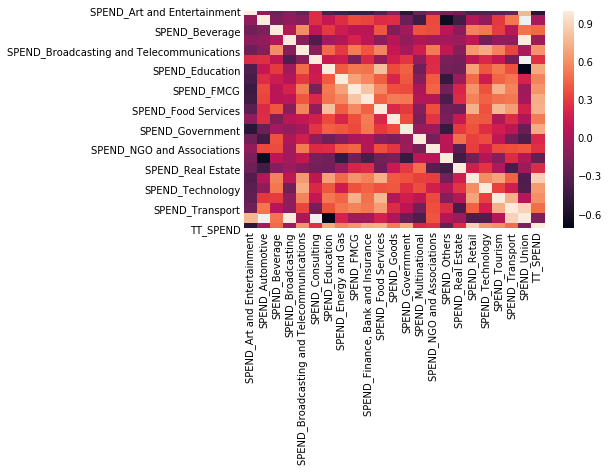

In [ ]:
#Check in the heatmap
sns.heatmap(df_industryT.corr());

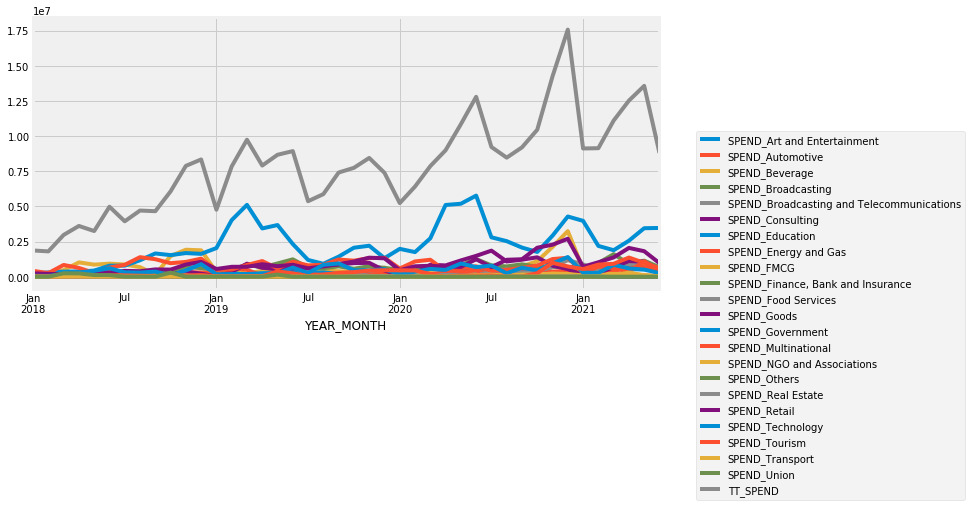

In [ ]:
#Checking the Channel Spend over time
df_industryT.groupby('YEAR_MONTH').sum().sort_values('YEAR_MONTH').plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

In [ ]:
df_industry.sort_values('SPEND',ascending=False).head(5)

,IMPRESSIONS,SPEND,CPM,%TT
INDUSTRY,,,,
Government,10619560685,9.697142e+07,9.131396,31.444402
Retail,4508072138,3.830928e+07,8.497930,12.422345
Multinational,1665361877,3.406171e+07,20.453038,11.045008
Beverage,1380701133,3.017547e+07,21.855176,9.784837
"Finance, Bank and Insurance",2755373020,2.676398e+07,9.713378,8.678613


In [ ]:
#Creating a channel view excluding the total 
df_industryT_nott = df_industryT.drop('TT_SPEND',axis=1)

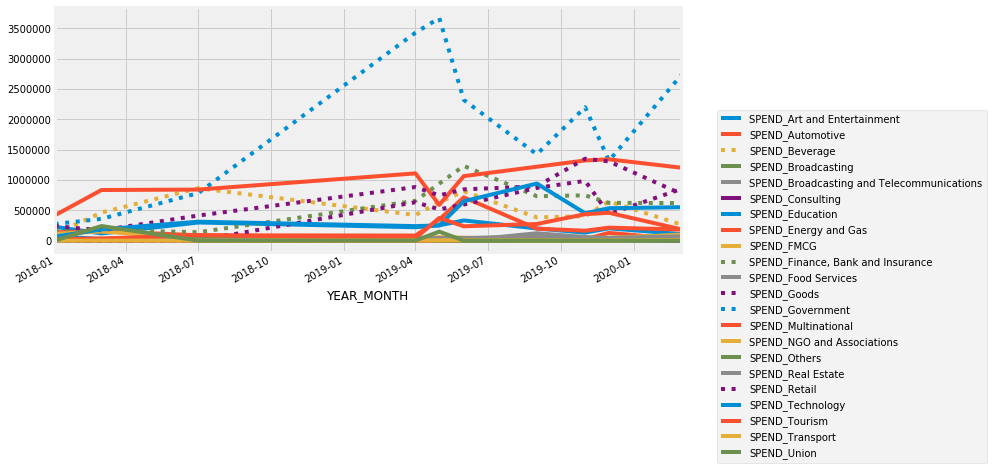

In [ ]:
#Creating the plot
df_industryT_nott.sample(10).groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5), style={'SPEND_Government':':', 
                                                                                      'SPEND_Finance, Bank and Insurance':':',
                                                                                      'SPEND_Retail':':',
                                                                                      'SPEND_Goods':':',
                                                                                      'SPEND_Beverage':':',
                                                                                     })


#df_channelT_nott.groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5),style={'SPEND_Audio':'--', 'SPEND_BVOD':'--'})
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

**INSIGHT**
- Government is was naturally increasion MoM until covid when just dramatically change the scenario

In [ ]:
#Creating a channel view excluding the GOVERNMENT 
df_industryT_notgov = df_industryT_nott.drop('SPEND_Government',axis=1)

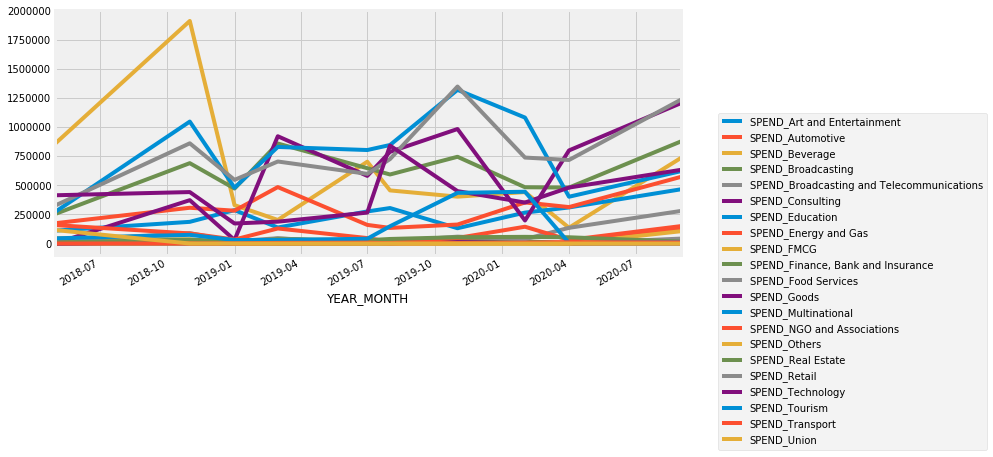

In [ ]:
#Excluding GOVERNMENT 
#Creating the plot BASED on Sample
df_industryT_notgov.sample(10).groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5)
                                                                                     )


#df_channelT_nott.groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5),style={'SPEND_Audio':'--', 'SPEND_BVOD':'--'})
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

In [ ]:
#Creating a sub data frame with a sample
df_industryT_nott_s = df_industryT_nott.sample(n=10, axis='columns',random_state=1)

In [ ]:
df_industryT_nott_s.sum()

SPEND_Tourism                                1.178773e+07
SPEND_Real Estate                            1.170468e+06
SPEND_Broadcasting                           5.981874e+05
SPEND_Multinational                          3.406171e+07
SPEND_Technology                             1.955183e+07
SPEND_Others                                 2.775816e+05
SPEND_Food Services                          9.393018e+06
SPEND_Broadcasting and Telecommunications    5.285034e+05
SPEND_Beverage                               3.017547e+07
SPEND_Retail                                 3.830928e+07
dtype: float64

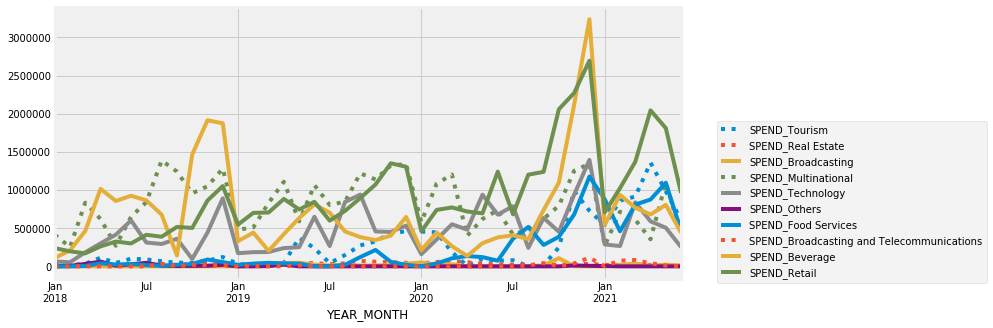

In [ ]:
df_industryT_nott_s.groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5), style={'SPEND_Tourism':':',
       'SPEND_Real Estate':':',
       'SPEND_Broadcasting and Telecommunications':':', 'SPEND_Multinational':':'})

#df_channelT_nott.groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5),style={'SPEND_Audio':'--', 'SPEND_BVOD':'--'})
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

In [ ]:
#Creating a data frame do analysing total/average over advertisers, spend and channel per month
#Starting by copying into a new data frame and reseting the index
df_adv_channel_tt  = df_prod4.reset_index()
#Creating aggregated functions for the GroupBy
aggregations_adv_channel_tt = {'SPEND' : ['sum', 'mean'],
                            'CLIENT_NAME':['count','nunique'],
                            'CHANNEL_NAME':['count','nunique']
                           }

#Groupby
df_adv_channel_tt  = df_adv_channel_tt.groupby('YEAR_MONTH')[['CLIENT_NAME', 'CHANNEL_NAME', 'SPEND']].agg(aggregations_adv_channel_tt)
#Eliminating the MultiINDEX 
df_adv_channel_tt.columns = ['_'.join(col) if type(col) is tuple else col for col in df_adv_channel_tt.columns.values]

In [ ]:
df_adv_channel_tt.head(3)

,SPEND_sum,SPEND_mean,CLIENT_NAME_count,CLIENT_NAME_nunique,CHANNEL_NAME_count,CHANNEL_NAME_nunique
YEAR_MONTH,,,,,,
2018-01-01,1.863130e+06,19820.534781,94,36,94,7
2018-02-01,1.799574e+06,18552.312191,97,35,97,7
2018-03-01,2.967806e+06,21822.106259,136,45,136,7


In [ ]:
df_adv_channel_tt.describe()

,SPEND_sum,SPEND_mean,CLIENT_NAME_count,CLIENT_NAME_nunique,CHANNEL_NAME_count,CHANNEL_NAME_nunique
count,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.845347e+06,36197.098715,207.928571,53.857143,207.928571,7.071429
std,3.375352e+06,9403.748752,49.413829,6.873673,49.413829,0.558432
min,1.799574e+06,18552.312191,94.000000,35.000000,94.000000,6.000000
25%,5.264569e+06,29672.234198,180.500000,51.500000,180.500000,7.000000
50%,7.888474e+06,34853.504813,210.500000,55.000000,210.500000,7.000000
75%,9.178267e+06,41910.947922,233.750000,58.000000,233.750000,7.000000
max,1.756525e+07,61416.955005,301.000000,64.000000,301.000000,8.000000


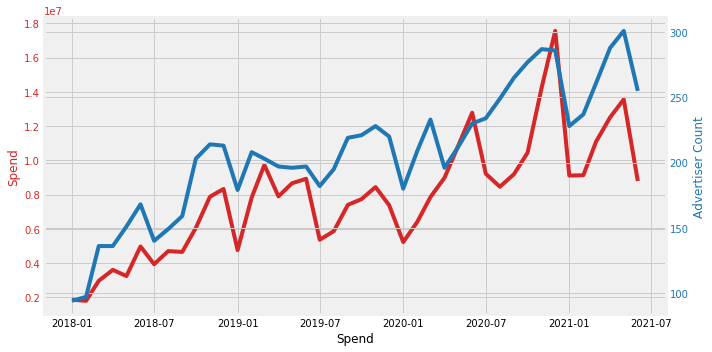

In [ ]:
t = df_adv_channel_tt.index.values
x_spend = df_adv_channel_tt.SPEND_sum
#x_spendmean = df_adv_channel_tt.SPEND_mean
y_clientcount = df_adv_channel_tt.CLIENT_NAME_count

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Spend')
ax1.set_ylabel('Spend', color=color)

ax1.plot(t, x_spend, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Advertiser Count', color=color)  # we already handled the x-label with ax1
ax2.plot(t, y_clientcount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.rcParams['font.size'] = 10
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
df_adv_channel_tt

,SPEND_sum,SPEND_mean,CLIENT_NAME_count,CLIENT_NAME_nunique,CHANNEL_NAME_count,CHANNEL_NAME_nunique
YEAR_MONTH,,,,,,
2018-01-01,1.863130e+06,19820.534781,94,36,94,7
2018-02-01,1.799574e+06,18552.312191,97,35,97,7
2018-03-01,2.967806e+06,21822.106259,136,45,136,7
2018-04-01,3.606184e+06,26516.059663,136,42,136,7
2018-05-01,3.244234e+06,21484.991105,151,43,151,7
2018-06-01,4.974188e+06,29608.259519,168,48,168,7
2018-07-01,3.936941e+06,28121.005796,140,43,140,7
2018-08-01,4.701702e+06,31555.045744,149,49,149,7
2018-09-01,4.654772e+06,29275.297313,159,48,159,7


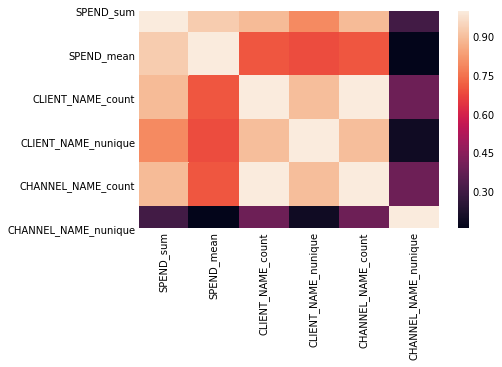

In [ ]:
#Heatmaping 
sns.heatmap(df_adv_channel_tt.corr());

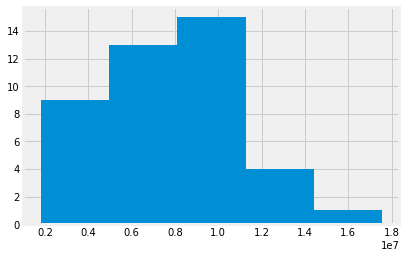

In [ ]:
#Histogram
df_adv_channel_tt.SPEND_sum.hist(bins=5);

- CPM over time

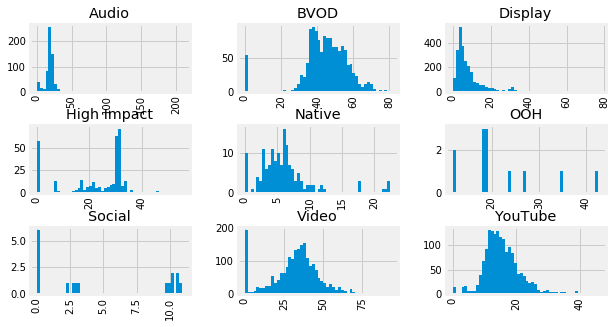

In [ ]:
#Histogram.
df_prod4.hist(bins=50,figsize=(10,5),column='CPM', by='CHANNEL_NAME');

---

### Determine how to handle sampling or missing values.

- As stated in the previous section, the missing values were manage in a previous analysis process. And the left Null values where in numeric columns which were replaced by 0

In [ ]:
#Counting all the NULLS
null_df4 = pd.DataFrame(df_prod4.isnull().sum(), columns=['Count of Nulls'])
null_df4.index.name = 'Column'
null_df4.sort_values(['Count of Nulls'], ascending=False).head(20)

,Count of Nulls
Column,
CLIENT_NAME,0
INDUSTRY,0
AGENCY_NAME,0
CHANNEL_NAME,0
PROGRAMMATIC_TYPE,0
IMPRESSIONS,0
SPEND,0
CPM,0


---

### Clearly identify shortcomings, assumptions, and next steps.

---

<a name="notebook"></a>
### PART 3: **Findings** 

### PART 3: **Findings** 
#### Predicting Spends across one of the advertising agencies



The following findings are the model created to predict the Agency EVE spends in 2020 using 2018-2019 as a training dataframe.

#### Time Series Data preparation

In [ ]:
#Creating a new Data Frame in order to separate from data analysis to data modeling
df = df_prod4

In [ ]:
#Double checking if the data looks fine
df.sample(5)

Column,CLIENT_NAME,INDUSTRY,AGENCY_NAME,CHANNEL_NAME,PROGRAMMATIC_TYPE,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,,,,,,
2018-06-01,Billie Others,Others,MIKE,Video,Open Exchange,0,0.000000,0.000000
2019-02-01,Elena Government,Government,EVE,Audio,PMP,151702,3322.079904,21.898722
2021-03-01,Edward Retail,Retail,MIKE,Video,PMP,468703,14436.707459,30.801398
2018-08-01,Ashton Goods,Goods,EVE,Video,PMP,1309,53.062713,40.536832
2020-01-01,"Riley Finance, Bank and Insurance","Finance, Bank and Insurance",EVE,Audio,PMP,62307,1427.160627,22.905302


In [ ]:
#The index is already based on a date which is in the correct format
df.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01'],
              dtype='datetime64[ns]', name='YEAR_MONTH', length=8733, freq=None)

#### Time Series Data preparation - Rolling Statistics

This time series is based breakdown by month, within data from Jan 2019 to May 2021 within only 8229 rows, therefore I didn't found enough reasons to apply a resampling and rolling mean. 

In [ ]:
#Data Frame Shape, Start and Finish
print("Time series Shape: ", df.shape)
print("Time series Start: ", df.index.min())
print("Time series Finish: ", df.index.max())

Time series Shape:  (8733, 8)
Time series Start:  2018-01-01 00:00:00
Time series Finish:  2021-06-01 00:00:00


#### Autocorrelation and time differencing - Spends for Agency EVE

- Data Preparation

In [ ]:
df.columns

Index(['CLIENT_NAME', 'INDUSTRY', 'AGENCY_NAME', 'CHANNEL_NAME',
       'PROGRAMMATIC_TYPE', 'IMPRESSIONS', 'SPEND', 'CPM'],
      dtype='object', name='Column')

In [ ]:
#train_naive = df_agency_eve_spends['2018': '2019']
df_agency_eve = df[df['AGENCY_NAME']=="EVE"].groupby(['YEAR_MONTH'],as_index =True).agg({'SPEND':'sum'}).sort_values('YEAR_MONTH',ascending=True) 
df_agency_eve = df_agency_eve['2018': '2020']

In [ ]:
df_agency_eve.head()

In [ ]:
df_agency_eve.shape

(36, 1)

In [ ]:
df_agency_eve.columns

Index(['SPEND'], dtype='object')

In [ ]:
df_agency_eve.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='YEAR_MONTH', freq=None)

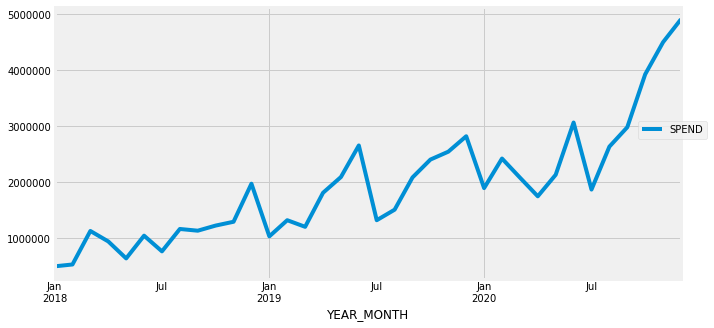

In [ ]:
df_agency_eve['SPEND'].groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

- Compute autocorrelation for Agency **EVE**

In [ ]:
col_lag_eve = []
for lag in np.arange(-11,20):
    df_agency_eve[f'lag{lag+1}'] = df_agency_eve['SPEND'].shift(lag+1)
    col_lag_eve.append(f'lag{lag+1}')

In [ ]:
#col_lag = []
#for lag in np.arange(-11,20):
#    store1_data[f'lag{lag+1}'] = store1_data['Sales'].shift(lag+1)
#    col_lag.append(f'lag{lag+1}')

In [ ]:
df_agency_eve.sample(5)

,SPEND,lag-10,lag-9,lag-8,lag-7,lag-6,lag-5,lag-4,lag-3,lag-2,lag-1,lag0,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-01,2.424441e+06,4.913188e+06,4.503465e+06,3.929079e+06,2.984054e+06,2.637281e+06,1.870181e+06,3.068058e+06,2.134530e+06,1.749786e+06,2.084503e+06,2.424441e+06,1.896341e+06,2.822884e+06,2.547104e+06,2.406161e+06,2.087000e+06,1.510761e+06,1.322474e+06,2.658205e+06,2.094116e+06,1.812527e+06,1.204585e+06,1.322686e+06,1.033980e+06,1.974951e+06,1.294942e+06,1.226683e+06,1.135178e+06,1.165982e+06,7.662036e+05,1.046347e+06
2020-08-01,2.637281e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.913188e+06,4.503465e+06,3.929079e+06,2.984054e+06,2.637281e+06,1.870181e+06,3.068058e+06,2.134530e+06,1.749786e+06,2.084503e+06,2.424441e+06,1.896341e+06,2.822884e+06,2.547104e+06,2.406161e+06,2.087000e+06,1.510761e+06,1.322474e+06,2.658205e+06,2.094116e+06,1.812527e+06,1.204585e+06,1.322686e+06,1.033980e+06,1.974951e+06
2020-07-01,1.870181e+06,NaN,NaN,NaN,NaN,NaN,4.913188e+06,4.503465e+06,3.929079e+06,2.984054e+06,2.637281e+06,1.870181e+06,3.068058e+06,2.134530e+06,1.749786e+06,2.084503e+06,2.424441e+06,1.896341e+06,2.822884e+06,2.547104e+06,2.406161e+06,2.087000e+06,1.510761e+06,1.322474e+06,2.658205e+06,2.094116e+06,1.812527e+06,1.204585e+06,1.322686e+06,1.033980e+06,1.974951e+06,1.294942e+06
2019-06-01,2.658205e+06,1.749786e+06,2.084503e+06,2.424441e+06,1.896341e+06,2.822884e+06,2.547104e+06,2.406161e+06,2.087000e+06,1.510761e+06,1.322474e+06,2.658205e+06,2.094116e+06,1.812527e+06,1.204585e+06,1.322686e+06,1.033980e+06,1.974951e+06,1.294942e+06,1.226683e+06,1.135178e+06,1.165982e+06,7.662036e+05,1.046347e+06,6.402422e+05,9.434393e+05,1.130143e+06,5.316416e+05,4.983017e+05,NaN,NaN,NaN
2020-12-01,4.913188e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.913188e+06,4.503465e+06,3.929079e+06,2.984054e+06,2.637281e+06,1.870181e+06,3.068058e+06,2.134530e+06,1.749786e+06,2.084503e+06,2.424441e+06,1.896341e+06,2.822884e+06,2.547104e+06,2.406161e+06,2.087000e+06,1.510761e+06,1.322474e+06,2.658205e+06,2.094116e+06,1.812527e+06


In [ ]:
df_agency_eve.head().T

YEAR_MONTH,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
SPEND,4.983017e+05,5.316416e+05,1.130143e+06,9.434393e+05,6.402422e+05
lag-10,1.294942e+06,1.974951e+06,1.033980e+06,1.322686e+06,1.204585e+06
lag-9,1.226683e+06,1.294942e+06,1.974951e+06,1.033980e+06,1.322686e+06
lag-8,1.135178e+06,1.226683e+06,1.294942e+06,1.974951e+06,1.033980e+06
lag-7,1.165982e+06,1.135178e+06,1.226683e+06,1.294942e+06,1.974951e+06
lag-6,7.662036e+05,1.165982e+06,1.135178e+06,1.226683e+06,1.294942e+06
lag-5,1.046347e+06,7.662036e+05,1.165982e+06,1.135178e+06,1.226683e+06
lag-4,6.402422e+05,1.046347e+06,7.662036e+05,1.165982e+06,1.135178e+06
lag-3,9.434393e+05,6.402422e+05,1.046347e+06,7.662036e+05,1.165982e+06
lag-2,1.130143e+06,9.434393e+05,6.402422e+05,1.046347e+06,7.662036e+05


In [ ]:
df_agency_eve.shape

(36, 32)

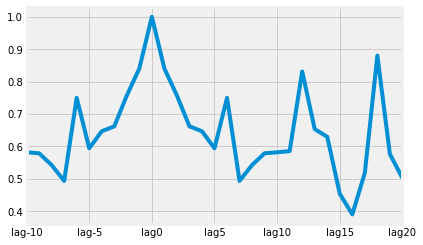

In [ ]:
df_agency_eve_corr = df_agency_eve.corr()['SPEND'][1:]
df_agency_eve_corr.loc[col_lag_eve].plot();

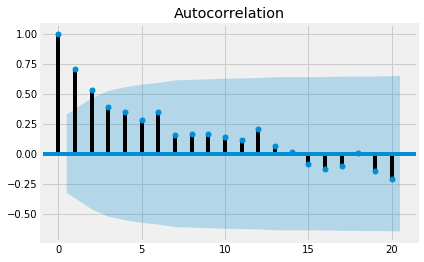

In [ ]:
plot_acf(df_agency_eve.SPEND.values, lags=20);
#plot_acf(store1_data.Sales.values, lags=30);

#### Partial Autocorrelation - Spends for Agency EVE

C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


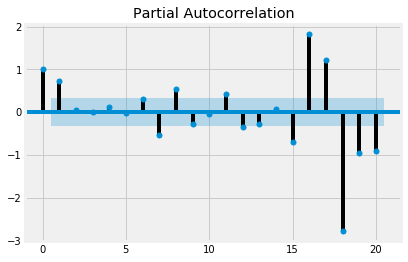

In [ ]:
plot_pacf(df_agency_eve.SPEND.values, lags=20)
plt.show()

#### Time differencing

In [ ]:
# Difference the unemployment rate
df_agency_eve['SPEND_diff'] = df_agency_eve['SPEND'].diff()
df_agency_eve[['SPEND','SPEND_diff']].head()

,SPEND,SPEND_diff
YEAR_MONTH,,
2018-01-01,4.983017e+05,NaN
2018-02-01,5.316416e+05,33339.932256
2018-03-01,1.130143e+06,598501.160712
2018-04-01,9.434393e+05,-186703.486094
2018-05-01,6.402422e+05,-303197.045240


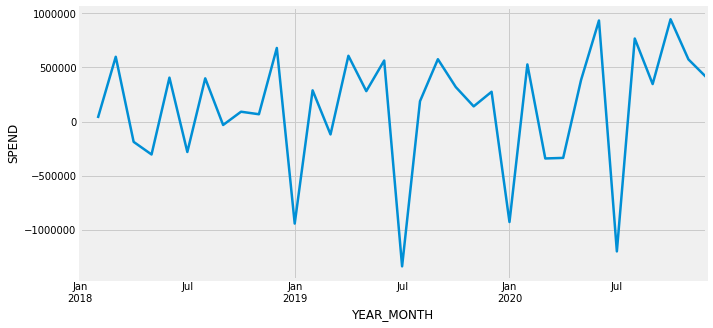

In [ ]:
df_agency_eve['SPEND_diff'].plot(lw=2.5, figsize=(10,5))
plt.ylabel('SPEND')
plt.show();

#### Time differencing

<Figure size 432x288 with 0 Axes>

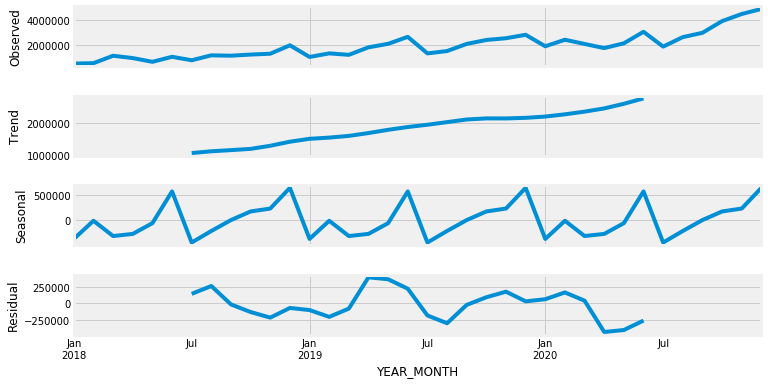

In [ ]:
decomposition_agency_eve = seasonal_decompose(df_agency_eve.SPEND, freq=12)  
fig = plt.figure()  
fig = decomposition_agency_eve.plot()  
fig.set_size_inches(12, 6);

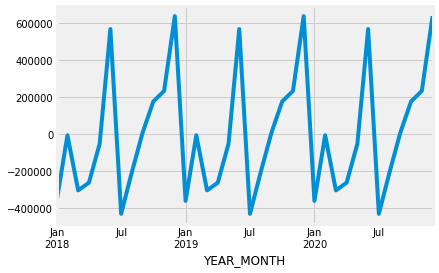

In [ ]:
seasonal_agency_eve = decomposition_agency_eve.seasonal ; seasonal_agency_eve.plot();

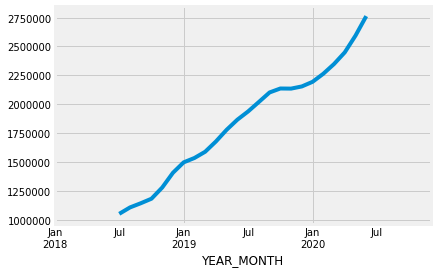

In [ ]:
trend_agency_eve = decomposition_agency_eve.trend; trend_agency_eve.plot();

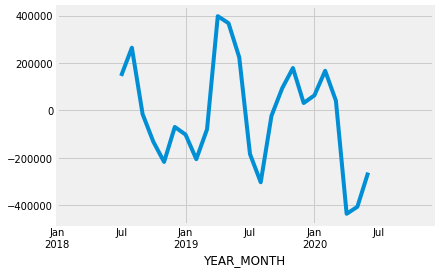

In [ ]:
resid_agency_eve = decomposition_agency_eve.resid; resid_agency_eve.plot();

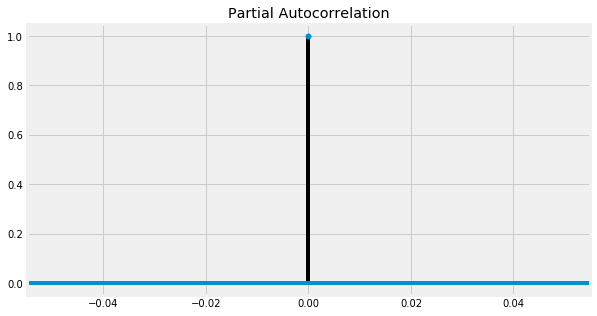

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid_agency_eve, lags=30, ax=ax)
plt.show()

#### Detrending

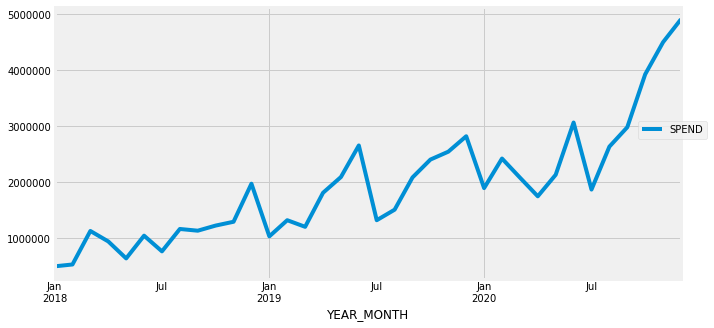

In [ ]:
#Original 
df_agency_eve['SPEND'].groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

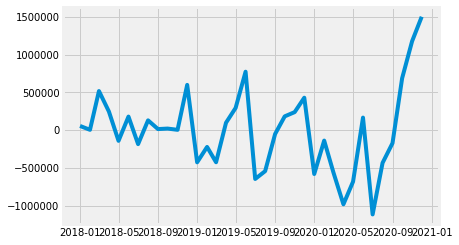

In [ ]:
#Detrending
detrending_agency_eve = scipy.signal.detrend(df_agency_eve.SPEND.values)
plt.plot(df_agency_eve.index.values, detrending_agency_eve);

#### Differencing

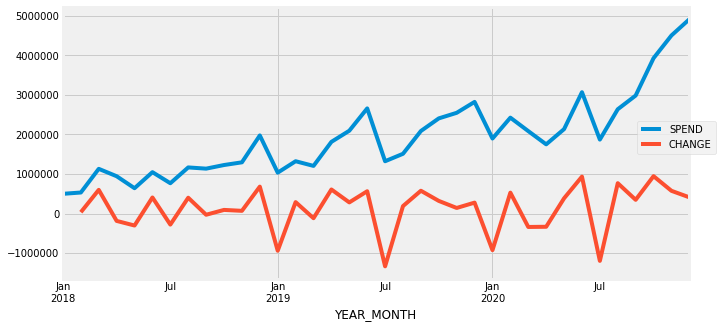

In [ ]:
df_agency_eve['CHANGE'] = df_agency_eve.SPEND.diff(1);
df_agency_eve[['SPEND','CHANGE']].plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

#### Time Series Forecasting Methods - 1 Naive Approach

In [ ]:
#Creating a more simple dataframe
df_agency_eve_spends  = df_agency_eve.groupby(['YEAR_MONTH'],as_index =True).agg({'SPEND':'sum'}).sort_values('YEAR_MONTH',ascending=True)

In [ ]:
df_agency_eve_spends.sample(4)

,SPEND
YEAR_MONTH,
2018-08-01,1.165982e+06
2020-08-01,2.637281e+06
2020-07-01,1.870181e+06
2020-10-01,3.929079e+06


In [ ]:
#Checking Index
df_agency_eve_spends.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='YEAR_MONTH', freq=None)

In [ ]:
#Getting started with Train and Test
train_naive = df_agency_eve_spends['2018': '2019']
test_naive =  df_agency_eve_spends['2020']

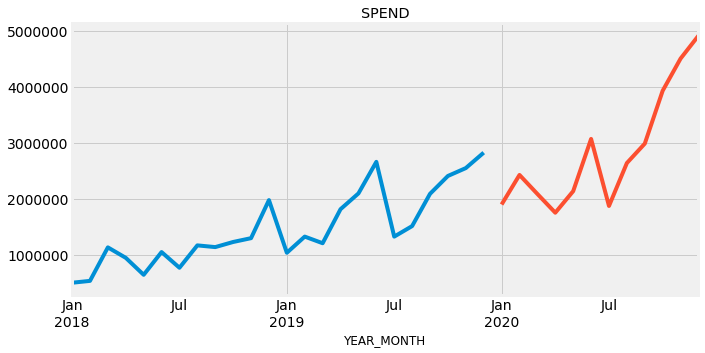

In [ ]:
#Ploting to see the how it looks like
train_naive.SPEND.plot(figsize=(10,5), title= 'SPEND', fontsize=14)
test_naive.SPEND.plot(figsize=(10,5), title= 'SPEND', fontsize=14)
plt.show();

In [ ]:
#Checking the Naive Method Effectiveness

In [ ]:
dd_naive = np.asarray(train_naive.SPEND)
dd_naive

array([ 498301.65000638,  531641.58226272, 1130142.74297515,
        943439.25688082,  640242.21164078, 1046346.637338  ,
        766203.61180422, 1165981.74285516, 1135178.37198779,
       1226683.01594305, 1294941.93091441, 1974950.69567225,
       1033979.63129416, 1322686.37088857, 1204584.99760864,
       1812527.12873644, 2094116.01422328, 2658205.47858554,
       1322474.27388296, 1510760.900908  , 2087000.11706582,
       2406161.3202274 , 2547103.6733245 , 2822884.4954455 ])

C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'best naive'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


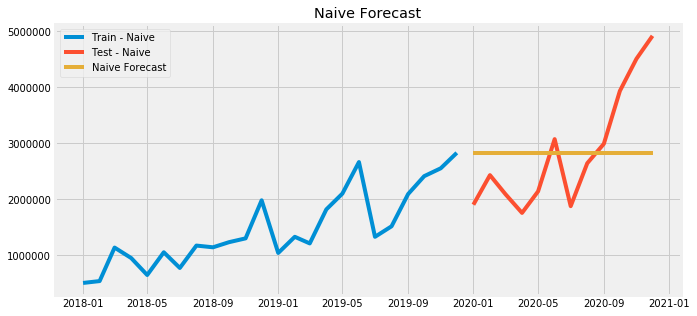

In [ ]:
y_hat_naive = test_naive.copy()
y_hat_naive['naive'] = dd_naive[len(dd_naive)-1]
plt.figure(figsize=(10,5))
plt.plot(train_naive.index, train_naive['SPEND'], label='Train - Naive')
plt.plot(test_naive.index,test_naive['SPEND'], label='Test - Naive')
plt.plot(y_hat_naive.index,y_hat_naive['naive'], label='Naive Forecast')
plt.legend(loc='best naive')
plt.title("Naive Forecast")
plt.show();

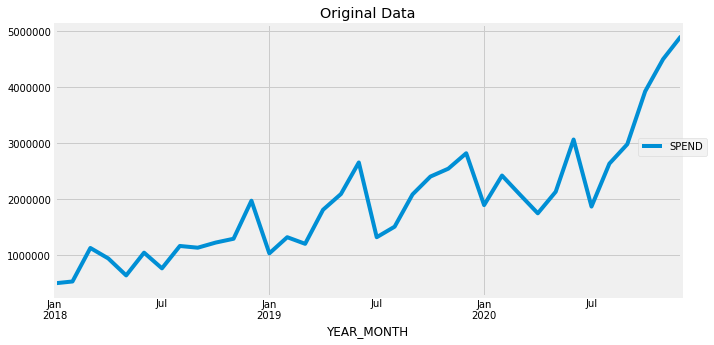

In [ ]:
#Original 
df_agency_eve['SPEND'].groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.title("Original Data")
plt.show;

In [ ]:
#Checking the RMSE
rms_naive = sqrt(mean_squared_error(test_naive.SPEND, y_hat_naive.naive))
print(rms_naive, 'of Naive RMSE ', )
print(y_hat_naive.SPEND.mean(), 'mean SPEND')
print(y_hat_naive.naive.mean(), 'mean Naive Spend')

1026051.4514230789 of Naive RMSE 
2849575.549257997 mean SPEND
2822884.495445498 mean Naive Spend


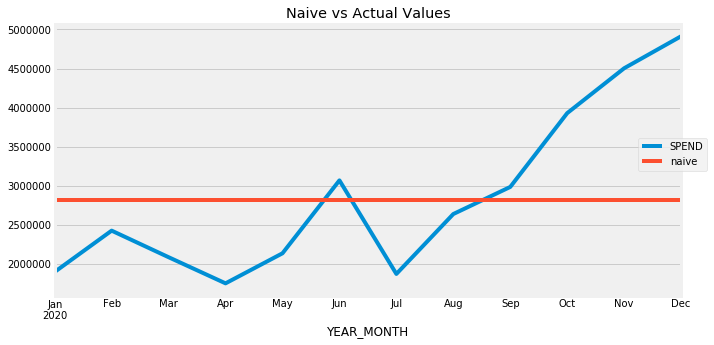

In [ ]:
y_hat_naive.plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.title("Naive vs Actual Values")
plt.show;

> **INSIGHTS**
- The Naive Method indeed can close predict the total spend with a difference of 1% compared to the test values. However as the latest chart shows it doesn't account to all the nuances of ups and downs which are natural in this market.

#### Time Series Forecasting Methods - 2 Simple Exponential Smoothing

In [ ]:
#Getting started with Train and Test
train_ses = df_agency_eve_spends['2018': '2019']
test_ses =  df_agency_eve_spends['2020']

In [ ]:
#Getting the Y
dd_ses = np.asarray(train_ses.SPEND)

In [ ]:
y_hat_ses = test_ses.copy()
y_hat_ses['ses'] = dd_ses[len(dd_ses)-1]
fit_ses = SimpleExpSmoothing(np.asarray(train_ses['SPEND'])).fit(smoothing_level=0.2,optimized=False)
fit2_ses = SimpleExpSmoothing(np.asarray(train_ses['SPEND'])).fit(smoothing_level=0.6,optimized=False)
fit3_ses = SimpleExpSmoothing(np.asarray(train_ses['SPEND'])).fit(optimized=True)
y_hat_ses['SES2'] = fit_ses.forecast(len(test_ses))
y_hat_ses['SES6'] = fit2_ses.forecast(len(test_ses))
y_hat_ses['SESTrue'] = fit3_ses.forecast(len(test_ses))

C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'best - SES'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


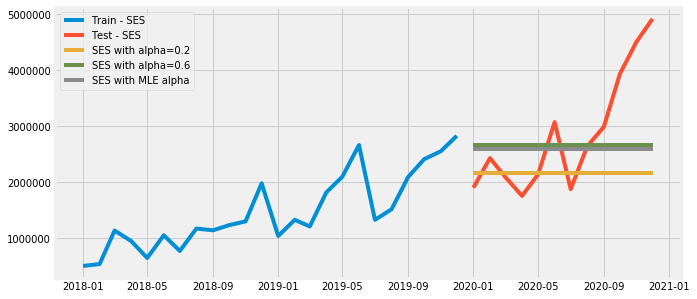

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_ses['SPEND'], label='Train - SES ')
plt.plot(test_ses['SPEND'], label='Test - SES')
plt.plot(y_hat_ses['SES2'], label='SES with alpha=0.2')
plt.plot(y_hat_ses['SES6'], label='SES with alpha=0.6')
plt.plot(y_hat_ses['SESTrue'], label='SES with MLE alpha')
plt.legend(loc='best - SES')
plt.show();

In [ ]:
rms2_ses = sqrt(mean_squared_error(test_ses.SPEND, y_hat_ses.SES2))
rms6_ses = sqrt(mean_squared_error(test_ses.SPEND, y_hat_ses.SES6))
rmsTrue_ses = sqrt(mean_squared_error(test_ses.SPEND, y_hat_ses.SESTrue))
print(rms2_ses, 'of SES - smoothing_level=0.2')
print(rms6_ses, 'of SES - smoothing_level=0.6')
print(rmsTrue_ses, 'of SES - optimized=True')

1239009.2844398525 of SES - smoothing_level=0.2
1043601.766915866 of SES - smoothing_level=0.6
1057013.984002102 of SES - optimized=True


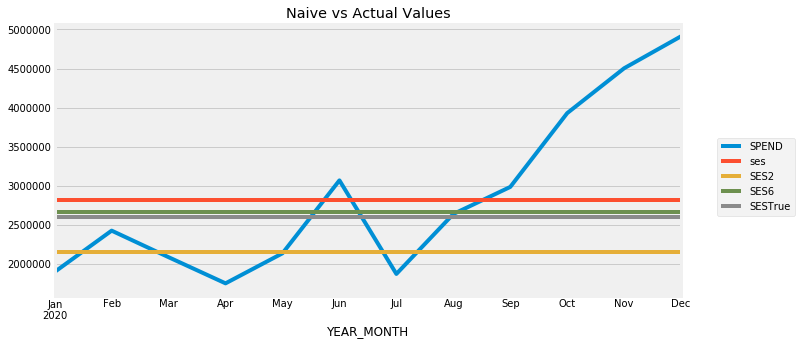

In [ ]:
y_hat_ses.plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.title("Naive vs Actual Values")
plt.show;

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_hwinner,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_hwinner,test_predictions)}')

In [ ]:
y_hat_ses

,SPEND,ses,SES2,SES6,SESTrue
YEAR_MONTH,,,,,
2020-01-01,1.896341e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-02-01,2.424441e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-03-01,2.084503e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-04-01,1.749786e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-05-01,2.134530e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-06-01,3.068058e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-07-01,1.870181e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-08-01,2.637281e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06
2020-09-01,2.984054e+06,2.822884e+06,2.154540e+06,2.657130e+06,2.594214e+06


#### Time Series Forecasting Methods - 3 Box-Jenkins (ARMA) methods - ARIMA

In [ ]:
#Getting started with Train and Test
df_agency_eve_spends = df_agency_eve.groupby(['YEAR_MONTH'],as_index =True).agg({'SPEND':'sum'}).sort_values('YEAR_MONTH',ascending=True)
train_arima = df_agency_eve_spends['2018': '2019']
test_arima =  df_agency_eve_spends['2020']

In [ ]:
# Augmented Dickey-Fuller test:
ad_fuller_result = adfuller(train_arima['SPEND'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.4437239286739965
p-value: 0.9973039962930718


In [ ]:
#Getting the array
#dd_arima = np.asarray(train_arima.SPEND)

In [ ]:
#Take the log difference in an effort to make it stationary
train_arima['SPEND'] = np.log(train_arima['SPEND'])
train_arima['SPEND'] = train_arima['SPEND'].diff()
train_arima = train_arima.drop(train_arima.index[0])

C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_arima.head()

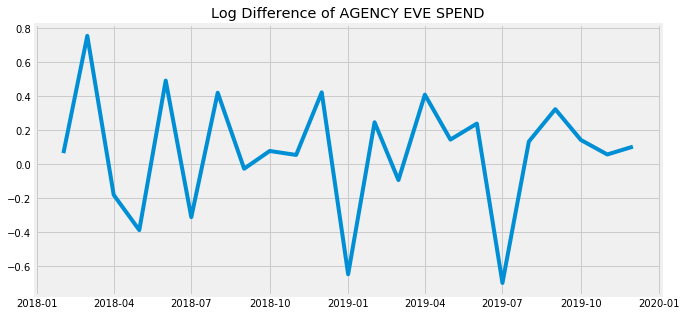

In [ ]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(train_arima['SPEND'])
plt.title("Log Difference of AGENCY EVE SPEND")
plt.show()

In [ ]:
# Seasonal differencing
train_arima['SPEND'] = train_arima['SPEND'].diff()

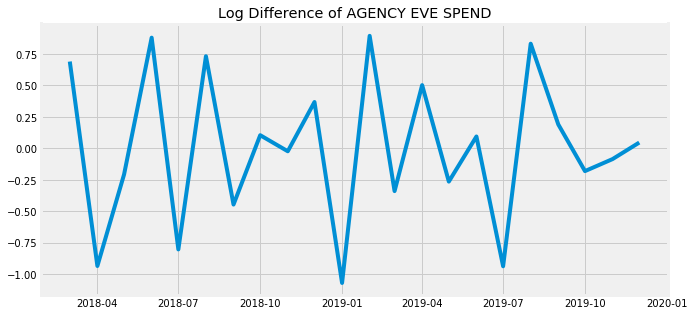

In [ ]:
#Ploting the new data
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(train_arima['SPEND'])
plt.title("Log Difference of AGENCY EVE SPEND")
plt.show()

In [ ]:
train_arima.(head)

In [ ]:
#Create a Function to find the best combination of parameters
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
#Giving the values for the function
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
#Testing 
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, train_arima['SPEND'])
result_df

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [ ]:
y_hat_arima = test_arima.copy()
y_hat_arima['ARIMA'] = dd_arima[len(dd_ses)-1]

fit1_arima = sm.tsa.statespace.SARIMAX(train_arima['SPEND'], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_arima['SARIMA - SPENDS'] = fit1_arima.predict( start="2018-01-01", end="2019-12-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_arima['SPEND'], label='Train - ARIMA')
plt.plot(test_arima['SPEND'], label='Test ARIMA')
plt.plot(y_hat_arima['SARIMA - SPENDS'], label='SARIMA - SPENDS')
plt.legend(loc='best ARIMA')
plt.show()

NameError: name 'dd_arima' is not defined

> **Insight**
- Unsuccessful in adapting the SARIMA model. However since in the Holt-Winner was more applicable I moved into the next Model

#### Time Series Forecasting Methods - 3 Holt-Winner's Method - ARIMA

- Predicting 2020, using 2018-2019 as a traininig

In [ ]:
#Getting started with Train and Test
df_agency_eve_spends = df_agency_eve.groupby(['YEAR_MONTH'],as_index =True).agg({'SPEND':'sum'}).sort_values('YEAR_MONTH',ascending=True)
train_hwinner = df_agency_eve_spends['2018': '2019']
test_hwinner =  df_agency_eve_spends['2020']

In [ ]:
train_hwinner.head()

,SPEND
YEAR_MONTH,
2018-01-01,4.983017e+05
2018-02-01,5.316416e+05
2018-03-01,1.130143e+06
2018-04-01,9.434393e+05
2018-05-01,6.402422e+05


C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

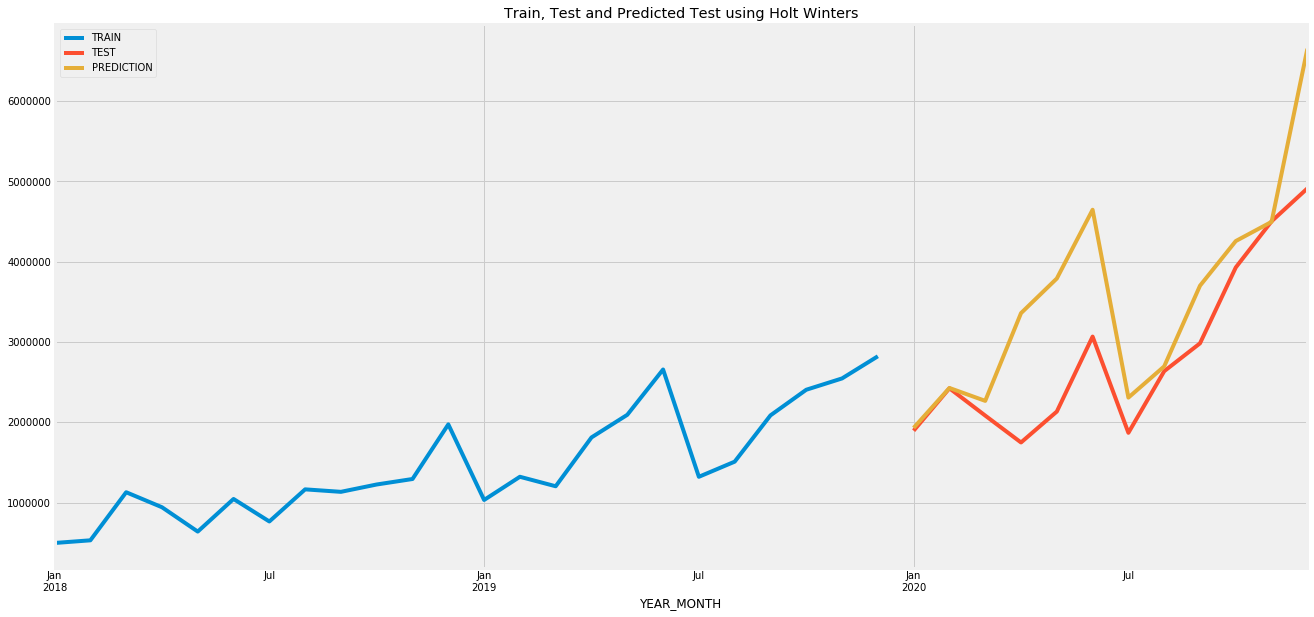

In [ ]:
#Forecasting with Holt-Winters Exponential Smoothing (Triple ES)
fitted_model = ExponentialSmoothing(train_hwinner['SPEND'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
train_hwinner['SPEND'].plot(legend=True,label='TRAIN')
test_hwinner['SPEND'].plot(legend=True,label='TEST',figsize=(20,10))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

ConversionError: Failed to convert value(s) to axis units: '2020–12–12'

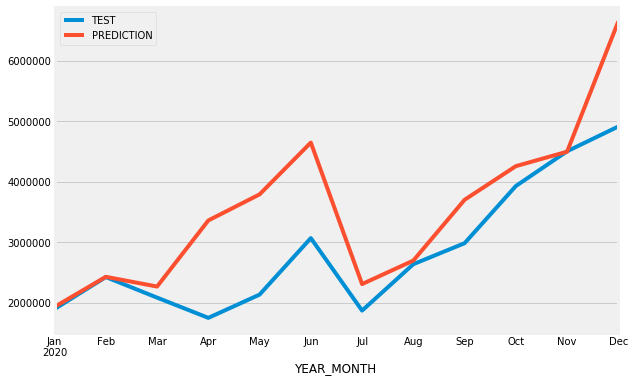

In [ ]:
#Close look at the Ploted Test vs Predicted data
test_hwinner['SPEND'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-01-01','2020–12–12']);

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_hwinner,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_hwinner,test_predictions)}')

Mean Absolute Error = 696406.9463507953
Mean Squared Error = 975292202531.0587


> **INSIGHTS**
- Starting in March until July is where we see the majority of the discrepancy, alongside with September. As a result this is making our model to be off. 

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_hwinner,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_hwinner,test_predictions)}')

Mean Absolute Error = 696406.9463507953
Mean Squared Error = 975292202531.0587


#### Time Series Forecasting Methods - 3 Holt-Winner's Method - Arima - Predicting first months of 2021

In [ ]:
#Creating the data frame
df_agency_eve2 = df[df['AGENCY_NAME']=="EVE"].groupby(['YEAR_MONTH'],as_index =True).agg({'SPEND':'sum'}).sort_values('YEAR_MONTH',ascending=True) 
df_agency_eve2 = df_agency_eve2['2018-01-01': '2021-05-01']

In [ ]:
df_agency_eve2.head()

,SPEND
YEAR_MONTH,
2018-01-01,4.983017e+05
2018-02-01,5.316416e+05
2018-03-01,1.130143e+06
2018-04-01,9.434393e+05
2018-05-01,6.402422e+05


In [ ]:
#Getting started with Train and Test
train_hwinner2 = df_agency_eve2['2018': '2020']
test_hwinner2 =  df_agency_eve2['2021']

In [ ]:
train_hwinner2.head()

,SPEND
YEAR_MONTH,
2018-01-01,4.983017e+05
2018-02-01,5.316416e+05
2018-03-01,1.130143e+06
2018-04-01,9.434393e+05
2018-05-01,6.402422e+05


In [ ]:
test_hwinner2.head()

,SPEND
YEAR_MONTH,
2021-01-01,2.586320e+06
2021-02-01,3.309007e+06
2021-03-01,3.105539e+06
2021-04-01,3.588444e+06
2021-05-01,4.784052e+06


C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

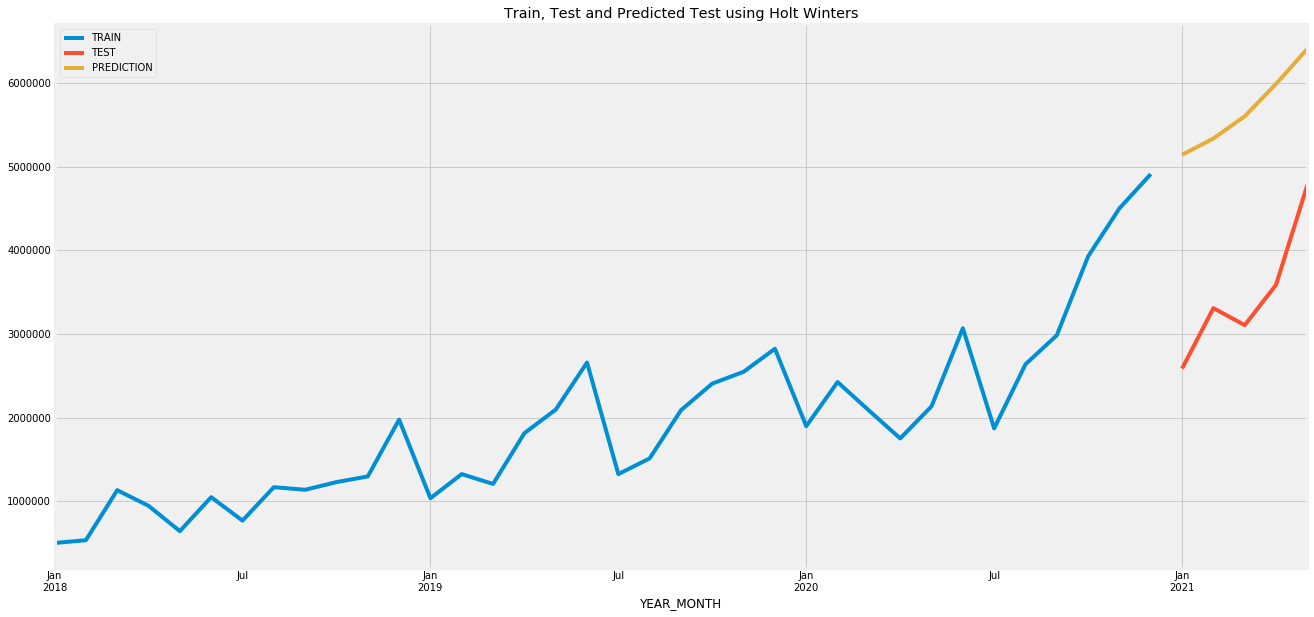

In [ ]:
#Forecasting with Holt-Winters Exponential Smoothing (Triple ES)
fitted_model2 = ExponentialSmoothing(train_hwinner2['SPEND'],trend='mul',seasonal='mul',seasonal_periods=5).fit()
test_predictions2 = fitted_model2.forecast(5)
train_hwinner2['SPEND'].plot(legend=True,label='TRAIN')
test_hwinner2['SPEND'].plot(legend=True,label='TEST',figsize=(20,10))
test_predictions2.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

ConversionError: Failed to convert value(s) to axis units: '2021–05–12'

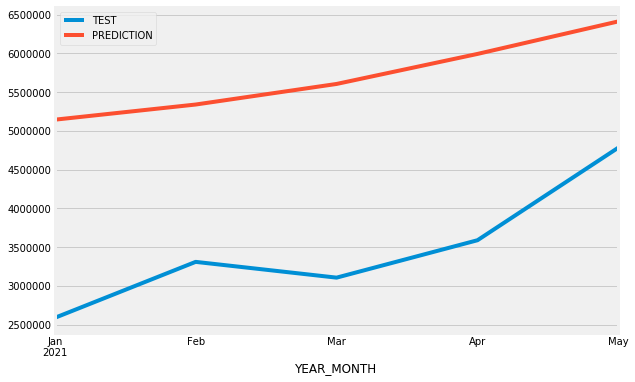

In [ ]:
#Close look at the Ploted Test vs Predicted data
test_hwinner2['SPEND'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions2.plot(legend=True,label='PREDICTION',xlim=['2021-01-01','2021–05–12']);

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_hwinner2,test_predictions2)}')
print(f'Mean Squared Error = {mean_squared_error(test_hwinner2,test_predictions2)}')

Mean Absolute Error = 2223949.902114427
Mean Squared Error = 5068233541307.953


> **INSIGHTS**
- Predicting 5 Months of 3 years given the latest one is super atypical drove a high MAE and MSE higher

### PART 3: **Findings** 
#### Predicting CPM across one of the channels



The following findings are the model created to predict the CPM of BVOD channels using 2018-2019 as a training dataframe.

#### Time Series - Predicting BVOD CPM

#### Time Series Data preparation - Rolling Statistics

- This time series is based breakdown by month, within data from Jan 2019 to May 2021 within only 8229 rows, therefore I didn't found enough reasons to apply a resampling and rolling mean. 

#### Autocorrelation and time differencing - Predicting BVOD CPM

- Data Preparation

In [ ]:
#This Data Frame, created during the EDA process already has the necessary data
df_bvod = df_prod4_bvod 
df_bvod.head()

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018-01-01,29437,2038.358158,69.244765
2018-02-01,572990,34083.358932,59.483340
2018-03-01,5131943,303872.587935,59.211996
2018-04-01,5314622,331152.475181,62.309695
2018-05-01,4657309,299784.536294,64.368616


In [ ]:
#Check in Shape
df_bvod.shape

(42, 3)

In [ ]:
#Check in index
df_bvod.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='YEAR_MONTH', freq=None)

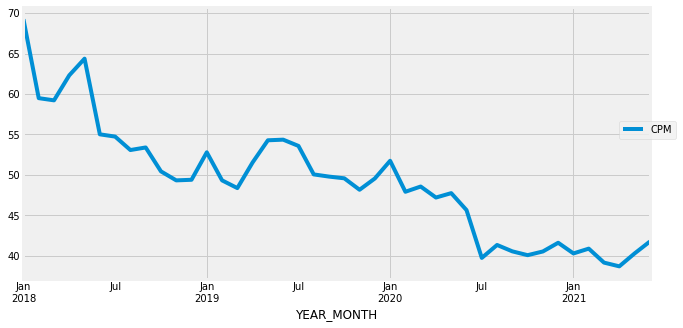

In [ ]:
#Df_prod4_bvod['CPM'].groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5))
df_bvod['CPM'].groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

- Compute autocorrelation for **BVOD CPM**

In [ ]:
col_lag_bvod = []
for lag in np.arange(-11,20):
    df_bvod[f'lag{lag+1}'] = df_bvod['CPM'].shift(lag+1)
    col_lag_bvod.append(f'lag{lag+1}')

In [ ]:
df_bvod.sample(5)

,IMPRESSIONS,SPEND,CPM,lag-10,lag-9,lag-8,lag-7,lag-6,lag-5,lag-4,lag-3,lag-2,lag-1,lag0,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01,5314622,3.311525e+05,62.309695,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,38193286,1.802198e+06,47.186261,40.863972,40.271501,41.590745,40.514495,40.054680,40.527049,41.317465,39.714842,45.632167,47.730900,47.186261,48.547785,47.901328,51.734655,49.544196,48.147837,49.565485,49.777521,50.048152,53.572031,54.346526,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164
2019-09-01,24031898,1.196248e+06,49.777521,39.714842,45.632167,47.730900,47.186261,48.547785,47.901328,51.734655,49.544196,48.147837,49.565485,49.777521,50.048152,53.572031,54.346526,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765
2018-12-01,16808708,8.300617e+05,49.382838,49.565485,49.777521,50.048152,53.572031,54.346526,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,19243486,9.489067e+05,49.310541,49.777521,50.048152,53.572031,54.346526,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_bvod.head().T

YEAR_MONTH,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
IMPRESSIONS,29437.000000,572990.000000,5.131943e+06,5.314622e+06,4.657309e+06
SPEND,2038.358158,34083.358932,3.038726e+05,3.311525e+05,2.997845e+05
CPM,69.244765,59.483340,5.921200e+01,6.230969e+01,6.436862e+01
lag-10,49.310541,49.382838,5.278197e+01,4.931171e+01,4.835529e+01
lag-9,50.424441,49.310541,4.938284e+01,5.278197e+01,4.931171e+01
lag-8,53.381481,50.424441,4.931054e+01,4.938284e+01,5.278197e+01
lag-7,53.063164,53.381481,5.042444e+01,4.931054e+01,4.938284e+01
lag-6,54.727523,53.063164,5.338148e+01,5.042444e+01,4.931054e+01
lag-5,55.006277,54.727523,5.306316e+01,5.338148e+01,5.042444e+01
lag-4,64.368616,55.006277,5.472752e+01,5.306316e+01,5.338148e+01


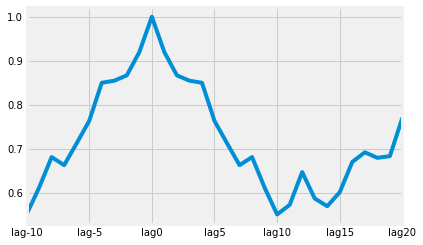

In [ ]:
df_bvod_corr = df_bvod.corr()['CPM'][1:]
df_bvod_corr.loc[col_lag_bvod].plot();

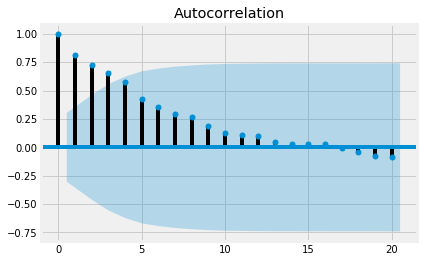

In [ ]:
plot_acf(df_bvod.CPM.values, lags=20);

#### Partial Autocorrelation - Spends for Agency EVE

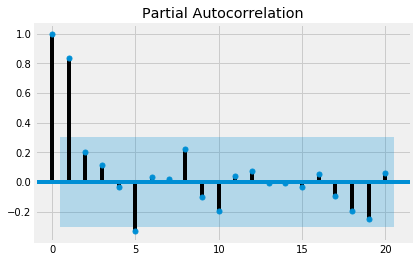

In [ ]:
plot_pacf(df_bvod.CPM.values, lags=20)
plt.show()

#### Time differencing

In [ ]:
# Difference the unemployment rate
df_bvod['CPM_diff'] = df_bvod['CPM'].diff()
df_bvod[['CPM','CPM_diff']].head()

,CPM,CPM_diff
YEAR_MONTH,,
2018-01-01,69.244765,NaN
2018-02-01,59.483340,-9.761425
2018-03-01,59.211996,-0.271344
2018-04-01,62.309695,3.097699
2018-05-01,64.368616,2.058921


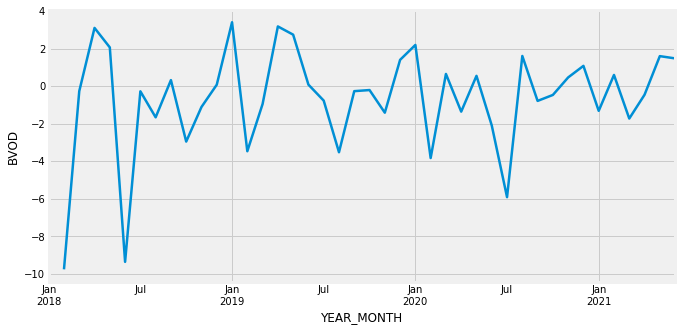

In [ ]:
df_bvod['CPM_diff'].plot(lw=2.5, figsize=(10,5))
plt.ylabel('BVOD')
plt.show();

#### Time differencing

<Figure size 432x288 with 0 Axes>

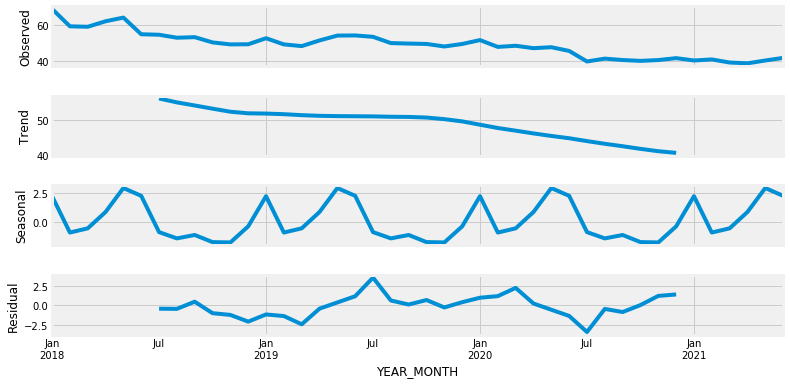

In [ ]:
decomposition_bvod = seasonal_decompose(df_bvod.CPM, freq=12)  
fig = plt.figure()  
fig = decomposition_bvod.plot()  
fig.set_size_inches(12, 6);

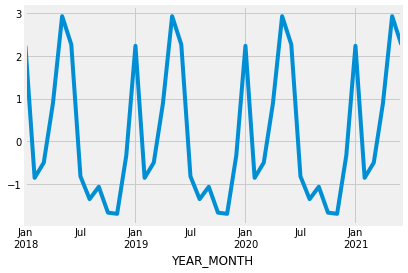

In [ ]:
seasonal_bvod = decomposition_bvod.seasonal ; seasonal_bvod.plot();

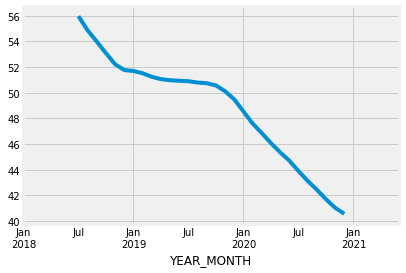

In [ ]:
trend_bvod = decomposition_bvod.trend; trend_bvod.plot();

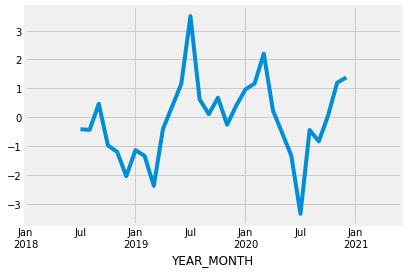

In [ ]:
resid_bvod = decomposition_bvod.resid; resid_bvod.plot();

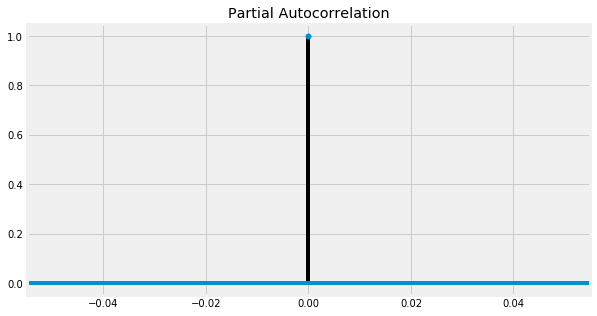

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid_bvod, lags=30, ax=ax)
plt.show()

#### Detrending

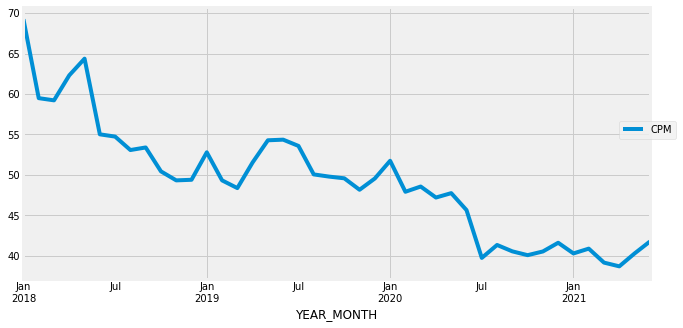

In [ ]:
#Original data
df_bvod['CPM'].groupby('YEAR_MONTH').sum().plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

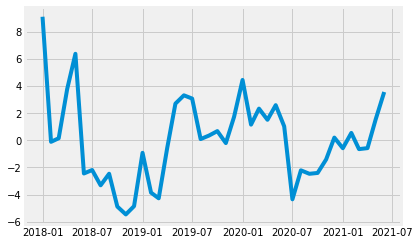

In [ ]:
#Detrending
detrending_bvod = scipy.signal.detrend(df_bvod.CPM.values)
plt.plot(df_bvod.index.values, detrending_bvod);

#### Differencing

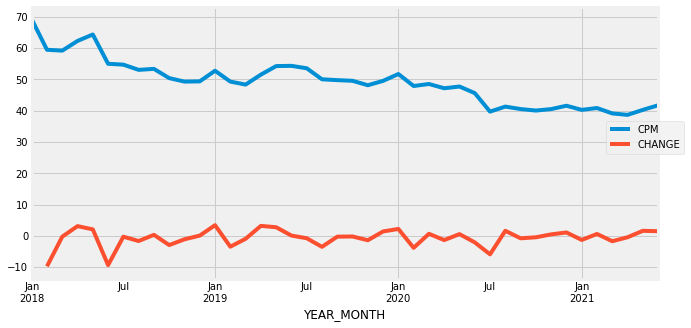

In [ ]:
df_bvod['CHANGE'] = df_bvod.CPM.diff(1);
df_bvod[['CPM','CHANGE']].plot(kind='line',figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show;

#### Time Series Forecasting Methods - Naive and SES

> **INSIGHTS**
- Given the results we had in predicting the spends across the agency EVE is these two models fall behind compared to Holt-Winters Exponential Smoothing which will be the focus on the following analysis.

#### Time Series Forecasting Methods - 3 Holt-Winner's Method - Arima - Predicting 2020 CPM

In [ ]:
df_prod4_bvod

,IMPRESSIONS,SPEND,CPM,lag-10,lag-9,lag-8,lag-7,lag-6,lag-5,lag-4,lag-3,lag-2,lag-1,lag0,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,CPM_diff,CHANGE
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,29437,2.038358e+03,69.244765,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,572990,3.408336e+04,59.483340,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.761425,-9.761425
2018-03-01,5131943,3.038726e+05,59.211996,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.271344,-0.271344
2018-04-01,5314622,3.311525e+05,62.309695,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.097699,3.097699
2018-05-01,4657309,2.997845e+05,64.368616,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.058921,2.058921
2018-06-01,10955150,6.026020e+05,55.006277,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.362340,-9.362340
2018-07-01,10097440,5.526079e+05,54.727523,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.278754,-0.278754
2018-08-01,8611303,4.569430e+05,53.063164,54.346526,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.664359,-1.664359
2018-09-01,7558166,4.034661e+05,53.381481,53.572031,54.346526,54.269902,51.531826,48.355288,49.311711,52.781974,49.382838,49.310541,50.424441,53.381481,53.063164,54.727523,55.006277,64.368616,62.309695,59.211996,59.483340,69.244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318318,0.318318


In [ ]:
#Getting started with Train and Test
train_bvod = df_prod4_bvod['2018': '2019']
test_bvod =  df_prod4_bvod['2020']

In [ ]:
train_bvod.head()

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2018-01-01,29437,2038.358158,69.244765
2018-02-01,572990,34083.358932,59.483340
2018-03-01,5131943,303872.587935,59.211996
2018-04-01,5314622,331152.475181,62.309695
2018-05-01,4657309,299784.536294,64.368616


In [ ]:
test_bvod.head()

,IMPRESSIONS,SPEND,CPM
YEAR_MONTH,,,
2020-01-01,11826941,6.118627e+05,51.734655
2020-02-01,18564604,8.892692e+05,47.901328
2020-03-01,31264292,1.517812e+06,48.547785
2020-04-01,38193286,1.802198e+06,47.186261
2020-05-01,42670251,2.036689e+06,47.730900


C:\Users\GustarroMarraJuliana\Documents\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

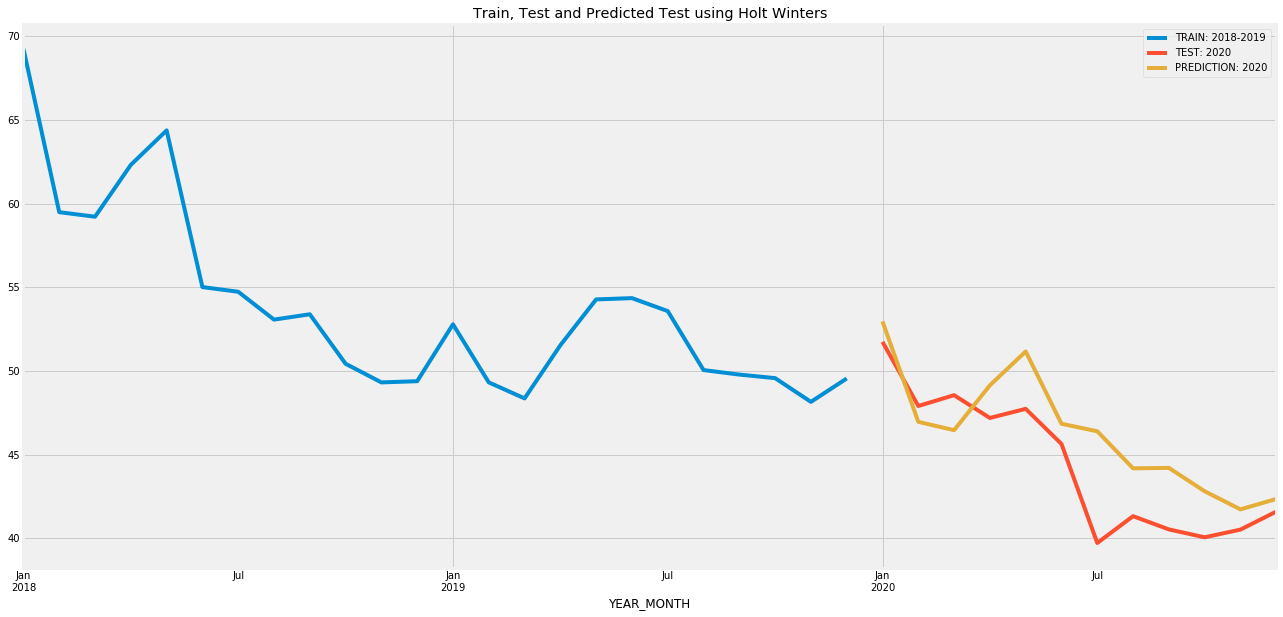

In [ ]:
#Forecasting with Holt-Winters Exponential Smoothing (Triple ES)
fitted_model3 = ExponentialSmoothing(train_bvod['CPM'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions3 = fitted_model3.forecast(12)
train_bvod['CPM'].plot(legend=True,label='TRAIN: 2018-2019')
test_bvod['CPM'].plot(legend=True,label='TEST: 2020',figsize=(20,10))
test_predictions3.plot(legend=True,label='PREDICTION: 2020')
plt.title('Train, Test and Predicted Test using Holt Winters')

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

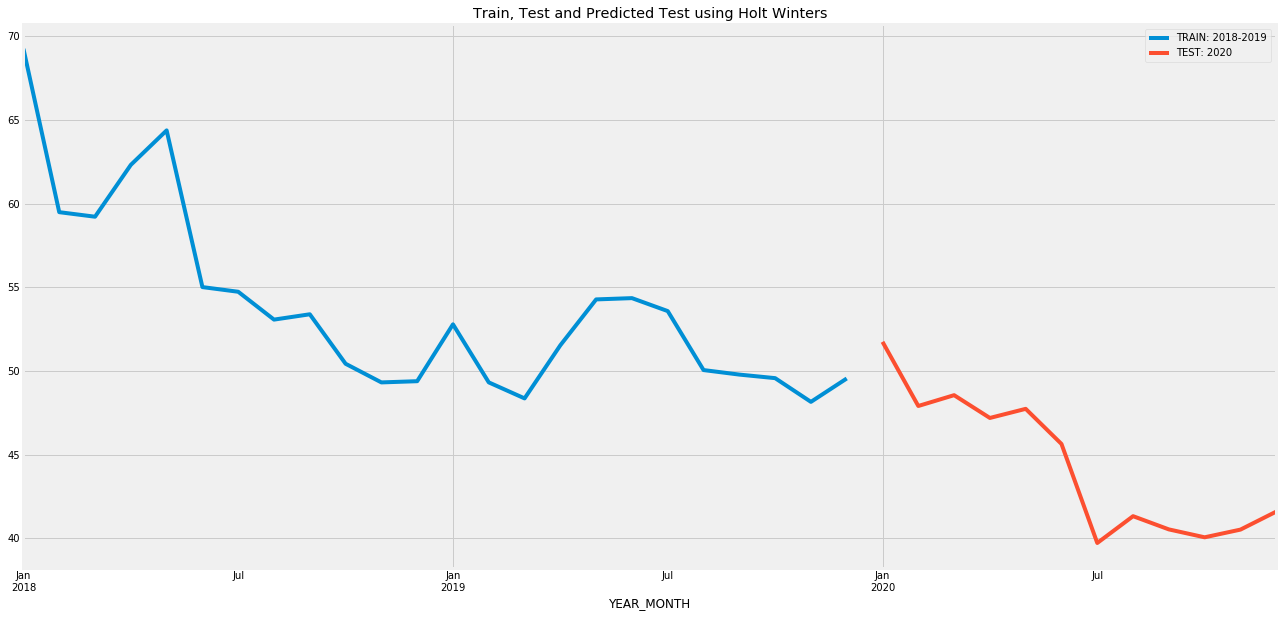

In [ ]:
#Visualing only the Train and Test
train_bvod['CPM'].plot(legend=True,label='TRAIN: 2018-2019')
test_bvod['CPM'].plot(legend=True,label='TEST: 2020',figsize=(20,10))
plt.title('Train, Test and Predicted Test using Holt Winters')

ConversionError: Failed to convert value(s) to axis units: '2020–12–01'

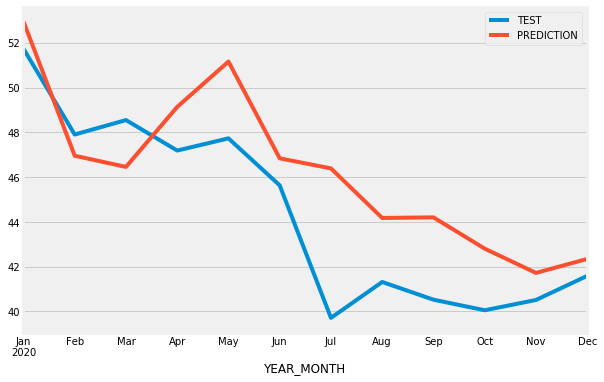

In [ ]:
#Close look at the Ploted Test vs Predicted data
test_bvod['CPM'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions3.plot(legend=True,label='PREDICTION',xlim=['2020-01-01','2020–12–01']);

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_bvod.CPM,test_predictions3)}')
print(f'Mean Squared Error = {mean_squared_error(test_bvod.CPM,test_predictions3)}')

Mean Absolute Error = 2.3973294604712696
Mean Squared Error = 8.300545041978346


In [ ]:
#Comparing CPMs: Training vs Test vs Forecast
print("Calculated Training CPM: ",train_bvod.SPEND.sum()/train_bvod.IMPRESSIONS.sum()*1000)
print("Calculated Training CPM only in 2018: ",train_bvod['2018'].SPEND.sum()/train_bvod['2018'].IMPRESSIONS.sum()*1000)
print("Calculated Training CPM only in 2019: ",train_bvod['2019'].SPEND.sum()/train_bvod['2019'].IMPRESSIONS.sum()*1000)
print("Average Training CPM 2018-2019: ",train_bvod.CPM.mean())
print("Average Training CPM in 2018: ",train_bvod['2018'].CPM.mean())
print("Average Training CPM in 2019: ",train_bvod['2019'].CPM.mean())
print("Calculated Test (2020) CPM: ",test_bvod.SPEND.sum()/test_bvod.IMPRESSIONS.sum()*1000)
print("Average Test CPM: ",test_bvod.CPM.mean())
print("Average Forecast CPM: ",test_predictions3.mean())

Calculated Training CPM:  51.44085240495785
Calculated Training CPM only in 2018:  53.265939897125996
Calculated Training CPM only in 2019:  50.68163736501855
Average Training CPM 2018-2019:  53.79863023914413
Average Training CPM in 2018:  56.65955634378196
Average Training CPM in 2019:  50.937704134506326
Calculated Test (2020) CPM:  43.046532611492935
Average Test CPM:  44.37103109091367
Average Forecast CPM:  46.26193427378306


> **INSIGHTS**
- Turns out the Holt-Winters Exponential Smoothing was good enough to predicting CPMs with an RMSE of 8.30. The test CPM was AUD 44 and the forecast was AUD 46 which is worth 4% and is completelly acceptable in the market in terms of discrepancy of CPM.

<a name="presentation"></a>
### PART 4: **Presentation** 

---


##### Gus_DATR24-Capstone_Presentation: 

> https://drive.google.com/file/d/1PrOiBhvts8bT-c0SeLnJbSY-XFzSmIoy/view?usp=sharing

---

## REFERENCES AND MENTIONS
- (1) Google’s Latest Announcement Confirms Cookie Deprecation Is A Chance To Kick The Identifier Addiction, Not Replace It - https://www.adexchanger.com/data-driven-thinking/googles-latest-announcement-confirms-cookie-deprecation-is-a-chance-to-kick-the-identifier-addiction-not-replace-it/ 
- Holt-Winters Exponential Smoothing: https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572
- Scale, Standardize, or Normalize with Scikit-Learn: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
- Python Code on Holt-Winters Forecasting: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873
- Walmart Sales-Time Series Analysis: https://www.kaggle.com/ankitverma2010/walmart-sales-time-series-analysis 